# <font color='red'> Project 2

### Project Description:
- Use the same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.You can use the same preprocessing steps as it was used in Project 1. 
- Apply recommended changes if there is any. 

### Regression Task:
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on the post PCA data. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result from project 1, prepare a similar table for all the models after PCA and compare. Does PCA help in getting better results? 
- Apply deep learning models (MLP) covered in class. 

### Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting. 
- Apply any two models with bagging and any two models with pasting. 
- Apply any two models with AdaBoost boosting. 
- Apply one model with gradient boosting. 
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class. 
- In all the classification tasks, consider the evaluation function you used in Project 1. 

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create final report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project2_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project2_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project2_Both_GroupXX_Lastname1_Lastname2.ipynb``
    
    then zip this file and the csv files of the two datasets into one file and submit. 

In [787]:
import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
import matplotlib.gridspec as gridspec
import itertools
from sklearn.tree import DecisionTreeClassifier
import os 
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import VotingClassifier

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

# Classification

#### Link to the airline passenger satisfaction dataset: 
https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction

## Project Description 

In [788]:
# Read data 
# classdf = pd.read_csv("classification_dataset.csv")

In [789]:
# # Shuffle and drop data 
# classdf = classdf.sample(frac=1)

In [790]:
# # Keep 1000 records
# classdf = classdf[:1000]

In [791]:
# # Split data into independent and dependent variables for missing data
# X = classdf.drop(['satisfaction', 'id'], axis=1)

In [792]:
# y = classdf[['satisfaction', 'id']]

In [793]:
# #Create missing values

# for col in X.columns:
#     X.loc[X.sample(frac=0.003).index, col] = np.nan

In [794]:
# df1 = pd.concat([X, y], axis=1)

In [795]:
# df1.isna().sum().sum() / len(df1)

In [796]:
# df1.to_csv('classification.csv')

### Read Data
Import data from .csv to Dataframe using Pandas

In [797]:
df = pd.read_csv("classification.csv")

### Explore and Transform Data
- EDA through histograms, bar charts, and correlation plots
- Check for missing data
- Scale data

#### Explore Dataset

Print out first and last rows of observation:

In [798]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,id
0,50578,50578.0,Female,Loyal Customer,26.0,Personal Travel,Eco Plus,617.0,1.0,5.0,...,5.0,2.0,5.0,4.0,4.0,2.0,12.0,20.0,neutral or dissatisfied,13813
1,29342,29342.0,Female,disloyal Customer,36.0,Business travel,Eco,308.0,2.0,2.0,...,4.0,5.0,4.0,2.0,3.0,3.0,51.0,44.0,neutral or dissatisfied,115549
2,21772,21772.0,Male,Loyal Customer,28.0,Business travel,Eco Plus,209.0,4.0,1.0,...,3.0,NaN,3.0,1.0,3.0,4.0,0.0,0.0,satisfied,34828
3,96426,96426.0,Male,disloyal Customer,24.0,Business travel,Business,356.0,5.0,4.0,...,5.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,satisfied,79041
4,80523,80523.0,Male,Loyal Customer,26.0,Business travel,Eco,515.0,4.0,1.0,...,1.0,3.0,4.0,4.0,4.0,4.0,22.0,24.0,satisfied,26127


In [799]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,id
995,16783,16783.0,Male,Loyal Customer,35.0,Personal Travel,Eco,110.0,0.0,5.0,...,2.0,3.0,3.0,2.0,2.0,3.0,77.0,74.0,satisfied,50493
996,5203,5203.0,Male,Loyal Customer,60.0,Business travel,Business,1542.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,2.0,0.0,0.0,satisfied,29699
997,86152,86152.0,Male,Loyal Customer,66.0,Personal Travel,Eco,545.0,4.0,2.0,...,2.0,4.0,1.0,1.0,2.0,2.0,0.0,1.0,neutral or dissatisfied,88711
998,43992,43992.0,Female,Loyal Customer,51.0,Business travel,Business,2506.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,3.0,55.0,56.0,satisfied,109857
999,19649,19649.0,Male,disloyal Customer,26.0,Business travel,Eco,533.0,1.0,3.0,...,4.0,4.0,4.0,3.0,4.0,4.0,55.0,56.0,neutral or dissatisfied,31272


Get info about the dataset variables and observations

In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1000 non-null   int64  
 1   Unnamed: 0.1                       997 non-null    float64
 2   Gender                             997 non-null    object 
 3   Customer Type                      997 non-null    object 
 4   Age                                997 non-null    float64
 5   Type of Travel                     997 non-null    object 
 6   Class                              997 non-null    object 
 7   Flight Distance                    997 non-null    float64
 8   Inflight wifi service              997 non-null    float64
 9   Departure/Arrival time convenient  997 non-null    float64
 10  Ease of Online booking             997 non-null    float64
 11  Gate location                      997 non-null    float6

The dataset consists of 1 identification column (id), 19 categorical variables (Gender, Customer Type, Type of travel, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, satisfaction), and 4 continuous variables (Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes).

The target variable in this dataset is satisfaction. The goal of this project is to create models that will help to predict whether a customer will be satisfied or dissatisfied about their flight with the airline.

Here we get basic descriptive statistics about continuous variables:

In [801]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
count,1000.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.00000,997.000000,997.000000,997.000000,997.000000,994.000000,1000.000000
mean,52057.521000,52055.742227,39.754263,1270.513541,2.785356,3.108325,2.792377,2.957874,3.182548,3.291876,...,3.395186,3.415246,3.421264,3.69007,3.289870,3.672016,3.295888,16.254764,16.153924,66107.302000
std,30421.257445,30437.168016,14.847985,1046.302927,1.335365,1.530907,1.429052,1.294191,1.310590,1.384098,...,1.323368,1.305721,1.292964,1.15784,1.303081,1.168422,1.296316,39.482614,40.064418,37593.030132
min,37.000000,37.000000,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,76.000000
25%,26161.750000,26166.000000,27.000000,442.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,0.000000,0.000000,31894.250000
50%,51379.500000,51379.000000,40.000000,903.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.00000,3.000000,4.000000,3.000000,0.000000,0.000000,68546.500000
75%,80255.000000,80516.000000,52.000000,1921.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,5.00000,4.000000,5.000000,4.000000,16.000000,14.000000,97185.750000
max,103821.000000,103821.000000,76.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,407.000000,409.000000,129717.000000


Before we begin graphing or doing transformations on the data, we will drop unnecessary columns that do not provide any information that could help with classifying the data, such as the id and unnamed columns

In [802]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1)

We see that id and the unnamed columns are no longer a part of the dataframe

In [803]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

##### Graphs and Plots
Below you can see different counts of categorical variables showing the distribution of the data

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '4.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '1.0'),
  Text(5, 0, '0.0')])

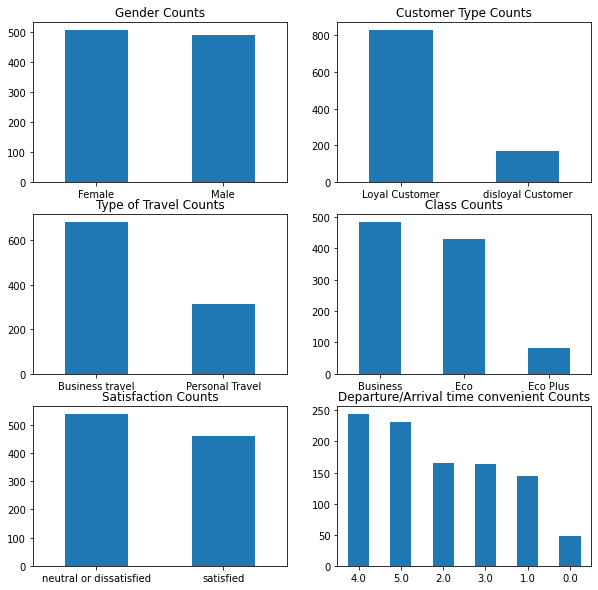

In [804]:
# Set up a grid of plots for categorical data and numerical data
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Gender counts
plt.subplot2grid(fig_dims, (0, 0))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')
plt.xticks(rotation=0)

# Plot Customer Type counts
plt.subplot2grid(fig_dims, (0, 1))
df['Customer Type'].value_counts().plot(kind='bar', 
                                       title='Customer Type Counts')
plt.xticks(rotation=0)

# Plot Type of Travel counts
plt.subplot2grid(fig_dims, (1, 0))
df['Type of Travel'].value_counts().plot(kind='bar', 
                                    title='Type of Travel Counts')
plt.xticks(rotation=0)

# Plot Class counts
plt.subplot2grid(fig_dims, (1, 1))
df['Class'].value_counts().plot(kind='bar', 
                                         title='Class Counts')
plt.xticks(rotation=0)

# Plot Satisfaction counts
plt.subplot2grid(fig_dims, (2, 0))
df['satisfaction'].value_counts().plot(kind='bar', 
                                         title='Satisfaction Counts')
plt.xticks(rotation=0)

# Plot Satisfaction counts
plt.subplot2grid(fig_dims, (2, 1))
df['Departure/Arrival time convenient'].value_counts().plot(kind='bar', 
                                         title='Departure/Arrival time convenient Counts')
plt.xticks(rotation=0)


<AxesSubplot:title={'center':'Gate location'}>

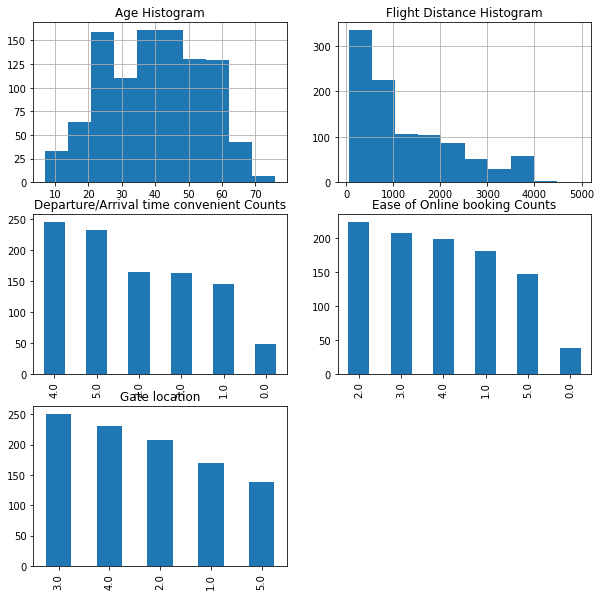

In [805]:
# Set up a grid of plots for categorical data and numerical data
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
df['Age'].hist()
plt.title('Age Histogram')

# Plot the Flight Distance histogram
plt.subplot2grid(fig_dims, (0, 1))
df['Flight Distance'].hist()
plt.title('Flight Distance Histogram')

# Plot the wifi service histogram
plt.subplot2grid(fig_dims, (1, 0))
df['Inflight wifi service'].value_counts().plot(kind='bar', 
                                         title='Inflight wifi service Counts')

# Plot the Departure/Arrival time convenient histogram
plt.subplot2grid(fig_dims, (1, 0))
df['Departure/Arrival time convenient'].value_counts().plot(kind='bar', 
                                         title='Departure/Arrival time convenient Counts')

# Plot the Ease of Online booking histogram
plt.subplot2grid(fig_dims, (1, 1))
df['Ease of Online booking'].value_counts().plot(kind='bar', 
                                         title='Ease of Online booking Counts')

# Plot the Gate location histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Gate location'].value_counts().plot(kind='bar', 
                                         title='Gate location')


##### Correlation plot of all variables

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'Flight Distance'),
  Text(2.5, 0, 'Inflight wifi service'),
  Text(3.5, 0, 'Departure/Arrival time convenient'),
  Text(4.5, 0, 'Ease of Online booking'),
  Text(5.5, 0, 'Gate location'),
  Text(6.5, 0, 'Food and drink'),
  Text(7.5, 0, 'Online boarding'),
  Text(8.5, 0, 'Seat comfort'),
  Text(9.5, 0, 'Inflight entertainment'),
  Text(10.5, 0, 'On-board service'),
  Text(11.5, 0, 'Leg room service'),
  Text(12.5, 0, 'Baggage handling'),
  Text(13.5, 0, 'Checkin service'),
  Text(14.5, 0, 'Inflight service'),
  Text(15.5, 0, 'Cleanliness'),
  Text(16.5, 0, 'Departure Delay in Minutes'),
  Text(17.5, 0, 'Arrival Delay in Minutes')])

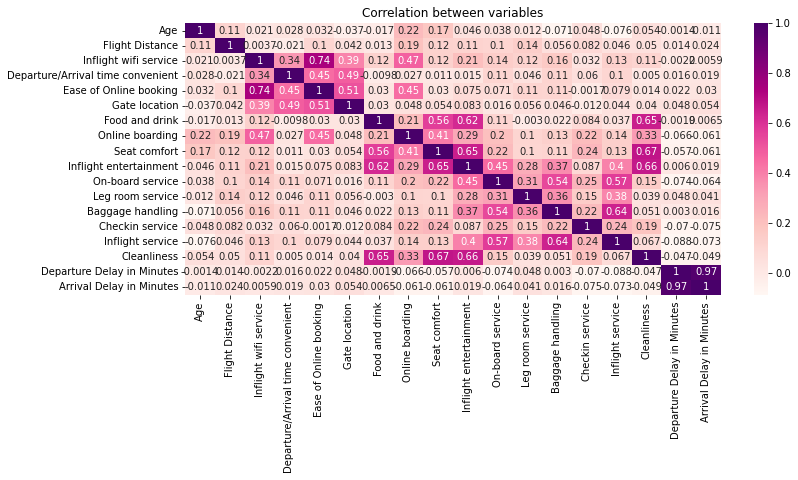

In [806]:
plt.subplots(figsize=(12,5))
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Correlation between variables')
plt.xticks(rotation=90)

According to the above correlation plots, there does not seem to be any major correlation between variables that would cause any issues except for the departure and arrival delays.

#### Missing Data & Transformations

In [807]:
# Get missing data for each column
df.isna().sum()

Gender                               3
Customer Type                        3
Age                                  3
Type of Travel                       3
Class                                3
Flight Distance                      3
Inflight wifi service                3
Departure/Arrival time convenient    3
Ease of Online booking               3
Gate location                        3
Food and drink                       3
Online boarding                      3
Seat comfort                         3
Inflight entertainment               3
On-board service                     3
Leg room service                     3
Baggage handling                     3
Checkin service                      3
Inflight service                     3
Cleanliness                          3
Departure Delay in Minutes           3
Arrival Delay in Minutes             6
satisfaction                         0
dtype: int64

In [808]:
# Get percentage of missing values for the dataset
print('Missing data: {:.2f}%'.format((df.isna().sum().sum() / len(df)) * 100))

Missing data: 6.90%


In [809]:
# View value counts for each column
for x in df.columns:
    print(df[x].value_counts())

Female    507
Male      490
Name: Gender, dtype: int64
Loyal Customer       830
disloyal Customer    167
Name: Customer Type, dtype: int64
36.0    34
26.0    30
39.0    29
43.0    29
24.0    28
        ..
64.0     3
11.0     2
7.0      2
76.0     1
75.0     1
Name: Age, Length: 66, dtype: int64
Business travel    683
Personal Travel    314
Name: Type of Travel, dtype: int64
Business    484
Eco         430
Eco Plus     83
Name: Class, dtype: int64
337.0     7
528.0     6
296.0     6
2475.0    6
109.0     6
         ..
2614.0    1
3103.0    1
2752.0    1
3375.0    1
1542.0    1
Name: Flight Distance, Length: 680, dtype: int64
2.0    261
3.0    224
4.0    204
1.0    162
5.0    121
0.0     25
Name: Inflight wifi service, dtype: int64
4.0    245
5.0    231
2.0    165
3.0    163
1.0    145
0.0     48
Name: Departure/Arrival time convenient, dtype: int64
2.0    224
3.0    208
4.0    199
1.0    181
5.0    147
0.0     38
Name: Ease of Online booking, dtype: int64
3.0    251
4.0    230
2.0    20

In [810]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

##### Categorical variables
For all categorical variables, we replace nulls with the mode of the column.
- Transformations done on nominal columns with only two values will include changing the value with the most counts to be 1 and the other value to be 0. 
- Transformations done on nominal columns with more than two values will be replaced with one-hot-coded vectors with the length of how many classes there are

##### Feature: Gender

In [811]:
df['Gender'].value_counts()

Female    507
Male      490
Name: Gender, dtype: int64

In [812]:
# Fill NAs with Female (mode of class)
df['Gender'].fillna('Female', inplace=True)

In [813]:
df['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [814]:
# Change column to binary - Male = 1, Female = 0
df['Gender'] = np.where(df['Gender'] == 'Female', 1, 0)

In [815]:
df['Gender'].value_counts()

1    510
0    490
Name: Gender, dtype: int64

##### Feature: Loyal Customer

In [816]:
df['Customer Type'].value_counts()

Loyal Customer       830
disloyal Customer    167
Name: Customer Type, dtype: int64

In [817]:
# Fill NAs with 'Loyal Customer' (mode)
df['Customer Type'].fillna('Loyal Customer', inplace=True)

In [818]:
df['Customer Type'].value_counts()

Loyal Customer       833
disloyal Customer    167
Name: Customer Type, dtype: int64

In [819]:
# Change column to binary Loyal Customer = 1, disloyal Customer = 0
df['Customer Type'] = np.where(df['Customer Type'] == 'Loyal Customer', 1, 0)

In [820]:
df['Customer Type'].value_counts()

1    833
0    167
Name: Customer Type, dtype: int64

##### Feature: Type of Travel

In [821]:
df['Type of Travel'].value_counts()

Business travel    683
Personal Travel    314
Name: Type of Travel, dtype: int64

In [822]:
# Fill NAs with mode
df['Type of Travel'].fillna('Business travel', inplace=True)

In [823]:
df['Type of Travel'].value_counts()

Business travel    686
Personal Travel    314
Name: Type of Travel, dtype: int64

In [824]:
# Change column to binary Business travel = 1, Personal travel = 0
df['Type of Travel'] = np.where(df['Type of Travel'] == 'Business travel', 1, 0)

In [825]:
df['Type of Travel'].value_counts()

1    686
0    314
Name: Type of Travel, dtype: int64

In [826]:
# Check to see if missing values
df['Type of Travel'].isna().sum()

0

##### Feature: Class

In [827]:
df['Class'].mode()

0    Business
dtype: object

In [828]:
# Fill in NAs with mode of class
df['Class'].fillna('Business', inplace=True)

In [829]:
df['Class'].value_counts()

Business    487
Eco         430
Eco Plus     83
Name: Class, dtype: int64

In [830]:
# Check to see if missing values
df['Class'].isna().sum() 

0

In [831]:
# get one-hot coded vector for Class
classes = pd.get_dummies(df['Class'], prefix="Class", drop_first = False)

In [832]:
# merge dummy variables into main dataframe
df2 = pd.concat([df, classes], axis=1)

In [833]:
# drop original column 'Class'
df2 = df2.drop('Class', axis=1)

No further transformations are needed for this column

##### Feature: Inflight wifi service

In [834]:
# Fill NAs with mode
df2['Inflight wifi service'].mode()

0    2.0
dtype: float64

In [835]:
df2['Inflight wifi service'].fillna(2.0, inplace=True)

In [836]:
df2['Inflight wifi service'].value_counts()

2.0    264
3.0    224
4.0    204
1.0    162
5.0    121
0.0     25
Name: Inflight wifi service, dtype: int64

In [837]:
# Check for nulls
df2['Inflight wifi service'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Departure/Arrival time convenient

In [838]:
# Replace NAs with mode (4.0)
df2['Departure/Arrival time convenient'].mode()

0    4.0
dtype: float64

In [839]:
# Replace NAs with mode (4.0)
df2['Departure/Arrival time convenient'].fillna(4.0, inplace=True)

In [840]:
df2['Departure/Arrival time convenient'].value_counts()

4.0    248
5.0    231
2.0    165
3.0    163
1.0    145
0.0     48
Name: Departure/Arrival time convenient, dtype: int64

In [841]:
# Check for nulls
df2['Departure/Arrival time convenient'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Ease of Online booking

In [842]:
# Replace NAs with mode
df2['Ease of Online booking'].value_counts()

2.0    224
3.0    208
4.0    199
1.0    181
5.0    147
0.0     38
Name: Ease of Online booking, dtype: int64

In [843]:
df2['Ease of Online booking'].fillna(2.0, inplace=True)

In [844]:
df2['Ease of Online booking'].value_counts()

2.0    227
3.0    208
4.0    199
1.0    181
5.0    147
0.0     38
Name: Ease of Online booking, dtype: int64

In [845]:
# Check for nulls
df2['Ease of Online booking'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Gate Location

In [846]:
# Replace NAs with Mode
df2['Gate location'].value_counts()

3.0    251
4.0    230
2.0    208
1.0    170
5.0    138
Name: Gate location, dtype: int64

In [847]:
df2['Gate location'].fillna(3.0, inplace=True)

In [848]:
df2['Gate location'].value_counts()

3.0    254
4.0    230
2.0    208
1.0    170
5.0    138
Name: Gate location, dtype: int64

In [849]:
# Check for missing values
df2['Gate location'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Food and Drink

In [850]:
# Replace NAs with mode
df2['Food and drink'].value_counts()

3.0    246
2.0    216
5.0    214
4.0    204
1.0    117
Name: Food and drink, dtype: int64

In [851]:
df2['Food and drink'].fillna(3.0, inplace=True)

In [852]:
df2['Food and drink'].value_counts()

3.0    249
2.0    216
5.0    214
4.0    204
1.0    117
Name: Food and drink, dtype: int64

In [853]:
# Check for missing values
df2['Food and drink'].isna().sum()

0

No further transformations are needed for this column

In [854]:
# Replace NAs with null 
df2['Online boarding'].value_counts()

4.0    307
5.0    217
3.0    184
2.0    151
1.0    115
0.0     23
Name: Online boarding, dtype: int64

In [855]:
df2['Online boarding'].fillna(4.0, inplace=True)

In [856]:
df2['Online boarding'].value_counts()

4.0    310
5.0    217
3.0    184
2.0    151
1.0    115
0.0     23
Name: Online boarding, dtype: int64

In [857]:
# Check for nulls
df2['Online boarding'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Seat comfort

In [858]:
# Replace nulls with mode
df2['Seat comfort'].value_counts()

4.0    287
5.0    259
3.0    180
2.0    147
1.0    124
Name: Seat comfort, dtype: int64

In [859]:
df2['Seat comfort'].fillna(4.0, inplace=True)

In [860]:
df2['Seat comfort'].value_counts()

4.0    290
5.0    259
3.0    180
2.0    147
1.0    124
Name: Seat comfort, dtype: int64

In [861]:
# Check missing values
df2['Seat comfort'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Inflight entertainment

In [862]:
# Replace NAs with mode
df2['Inflight entertainment'].value_counts()

4.0    260
5.0    260
3.0    198
2.0    172
1.0    107
Name: Inflight entertainment, dtype: int64

In [863]:
df2['Inflight entertainment'].fillna(4.0, inplace=True)

In [864]:
df2['Inflight entertainment'].value_counts()

4.0    263
5.0    260
3.0    198
2.0    172
1.0    107
Name: Inflight entertainment, dtype: int64

In [865]:
# Check for nulls
df2['Inflight entertainment'].isna().sum()

0

No further transformations are needed for this column

##### Feature: On-board Service

In [866]:
# Replace null values with mode
df2['On-board service'].value_counts()

4.0    296
5.0    243
3.0    207
2.0    134
1.0    117
Name: On-board service, dtype: int64

In [867]:
df2['On-board service'].fillna(4.0, inplace=True)

In [868]:
df2['On-board service'].value_counts()

4.0    299
5.0    243
3.0    207
2.0    134
1.0    117
Name: On-board service, dtype: int64

In [869]:
# Check missing
df2['On-board service'].isna().sum()

0

No further transformations are needed for this column

#### Feature: Leg Room Service

In [870]:
# Replace NAs with mode
df2['Leg room service'].value_counts()

4.0    293
5.0    245
3.0    195
2.0    169
1.0     91
0.0      4
Name: Leg room service, dtype: int64

In [871]:
df2['Leg room service'].fillna(4.0, inplace=True)

In [872]:
df2['Leg room service'].value_counts()

4.0    296
5.0    245
3.0    195
2.0    169
1.0     91
0.0      4
Name: Leg room service, dtype: int64

In [873]:
# Check missing
df2['Leg room service'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Baggage handling

In [874]:
# Replace null values with mode
df2['Baggage handling'].value_counts()

4.0    369
5.0    273
3.0    189
2.0    105
1.0     61
Name: Baggage handling, dtype: int64

In [875]:
df2['Baggage handling'].fillna(4.0, inplace=True)

In [876]:
df2['Baggage handling'].value_counts()

4.0    372
5.0    273
3.0    189
2.0    105
1.0     61
Name: Baggage handling, dtype: int64

In [877]:
# Check for nulls
df2['Baggage handling'].isna().sum()

0

No further transformations are needed for this column

#### Feature: Checkin Service

In [878]:
# Replace nulls with mode
df2['Checkin service'].value_counts()

3.0    263
4.0    259
5.0    213
1.0    134
2.0    128
Name: Checkin service, dtype: int64

In [879]:
df2['Checkin service'].fillna(3.0, inplace=True)

In [880]:
df2['Checkin service'].value_counts()

3.0    266
4.0    259
5.0    213
1.0    134
2.0    128
Name: Checkin service, dtype: int64

In [881]:
# Check missing
df2['Checkin service'].isna().sum()

0

No further transformations are needed for this column

##### Feature: Inflight service

In [882]:
# Replace nulls with mode
df2['Inflight service'].value_counts()

4.0    363
5.0    272
3.0    186
2.0    115
1.0     61
Name: Inflight service, dtype: int64

In [883]:
df2['Inflight service'].fillna(4.0, inplace=True)

In [884]:
df2['Inflight service'].value_counts()

4.0    366
5.0    272
3.0    186
2.0    115
1.0     61
Name: Inflight service, dtype: int64

In [885]:
# Check missing
df2['Inflight service'].isna().sum()

0

No further transformations are needed for this column

#### Feature: Cleanliness

In [886]:
# Replace nulls with mode
df2['Cleanliness'].value_counts()

3.0    256
4.0    252
5.0    218
2.0    149
1.0    122
Name: Cleanliness, dtype: int64

In [887]:
df2['Cleanliness'].fillna(3.0, inplace=True)

In [888]:
df2['Cleanliness'].value_counts()

3.0    259
4.0    252
5.0    218
2.0    149
1.0    122
Name: Cleanliness, dtype: int64

In [889]:
# Check missing
df2['Cleanliness'].isna().sum()

0

No further transformations are needed for this column

#### Continuous Variables

#### Feature: Flight Distance

In [890]:
# Replace Flight distance missing values with the mean of the column
df2['Flight Distance'].describe()

count     997.000000
mean     1270.513541
std      1046.302927
min        67.000000
25%       442.000000
50%       903.000000
75%      1921.000000
max      4963.000000
Name: Flight Distance, dtype: float64

In [891]:
dist_mean = df2['Flight Distance'].mean()

In [892]:
df2['Flight Distance'].fillna(dist_mean, inplace=True)

In [893]:
# Check missing
df2['Flight Distance'].isna().sum()

0

In [894]:
df2['Flight Distance'].describe()

count    1000.000000
mean     1270.513541
std      1044.730720
min        67.000000
25%       444.250000
50%       907.000000
75%      1921.000000
max      4963.000000
Name: Flight Distance, dtype: float64

Replaciing the missing values with the mean did not change the mean of the column.

No further transformations are needed for this column

#### Feature: Age

In [895]:
# Replace Age nulls with mean of the column
df2['Age'].describe()

count    997.000000
mean      39.754263
std       14.847985
min        7.000000
25%       27.000000
50%       40.000000
75%       52.000000
max       76.000000
Name: Age, dtype: float64

In [896]:
age_mean = df2['Age'].mean()

In [897]:
df2['Age'].fillna(age_mean, inplace=True)

In [898]:
# Check missing
df2['Age'].isna().sum()

0

In [899]:
df2['Age'].describe()

count    1000.000000
mean       39.754263
std        14.825674
min         7.000000
25%        27.000000
50%        40.000000
75%        52.000000
max        76.000000
Name: Age, dtype: float64

No further transformations are needed for this column

#### Feature: Departure Delay in Minutes

In [900]:
# Replace Departure Delay in Minutes null values with the mean of the column
df2['Departure Delay in Minutes'].describe()

count    997.000000
mean      16.254764
std       39.482614
min        0.000000
25%        0.000000
50%        0.000000
75%       16.000000
max      407.000000
Name: Departure Delay in Minutes, dtype: float64

In [901]:
departdelay_mean = df2['Departure Delay in Minutes'].mean()

In [902]:
df2['Departure Delay in Minutes'].fillna(departdelay_mean, inplace=True)

In [903]:
# Check nulls
df2['Departure Delay in Minutes'].isna().sum()

0

In [904]:
df2['Departure Delay in Minutes'].describe()

count    1000.000000
mean       16.254764
std        39.423286
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max       407.000000
Name: Departure Delay in Minutes, dtype: float64

Replacing the nulls with the mean of the column does not change the mean of the column.

#### Feature: Arrival Delay in Minutes

In [905]:
# Replace Arrival Delay in Minutes null values with the mean of the column
df2['Arrival Delay in Minutes'].describe()

count    994.000000
mean      16.153924
std       40.064418
min        0.000000
25%        0.000000
50%        0.000000
75%       14.000000
max      409.000000
Name: Arrival Delay in Minutes, dtype: float64

In [906]:
arrivedelay_mean = df2['Arrival Delay in Minutes'].mean()

In [907]:
df2['Arrival Delay in Minutes'].fillna(arrivedelay_mean, inplace=True)

In [908]:
df2['Arrival Delay in Minutes'].describe()

count    1000.000000
mean       16.153924
std        39.943923
min         0.000000
25%         0.000000
50%         0.000000
75%        15.000000
max       409.000000
Name: Arrival Delay in Minutes, dtype: float64

##### Feature: Satisfaction
We will not recode the satisfaction column

In [909]:
df2['satisfaction'].value_counts()

neutral or dissatisfied    540
satisfied                  460
Name: satisfaction, dtype: int64

In [910]:
df2['satisfaction'] = np.where(df2['satisfaction'] == 'neutral or dissatisfied', 1, 0)

Similar to Departure Delay in Minutes, replacing the null values in the Arrival Delay column keeps the mean the same as before replacing the missing values. 

Now, we check if there are any missing values in the dataset that might have been missed.

In [911]:
df2.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [912]:
for x in df2.columns:
    print(x)

Gender
Customer Type
Age
Type of Travel
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction
Class_Business
Class_Eco
Class_Eco Plus


## Modeling
In this part, we begin to model the data using different methods: 
* Apply two voting classifiers - one with hard voting and one with soft voting.
* Apply any two models with bagging and any two models with pasting.
* Apply any two models with AdaBoost boosting.
* Apply one model with gradient boosting.
* Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
* Apply deep learning models covered in class.

In all the classification tasks, we consider the evaluation function used in Project 1 - precision score - because we would like to correctly classify customers who are likely to be dissatisfied with the airline's service. 

Before any modeling is done, we will separate the independent variables from the dependent variables and also split the dataset into training and test datasets.

In [913]:
# Separate X and y variables
X = df2.drop(['satisfaction'], axis=1)
y = df2['satisfaction']

In [914]:
# Split into train and test datasets using random_state to get the same results each time the code is run
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

We also need to choose how we are going to scale the data because different columns have different ranges.
We do not want any skewness or imbalance. We chose to use the minmaxscaler in order to apply minimal scaling because most of the variables are scores in the 0-5 range.

In [915]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

### Voting Classifiers

#### Hard voting - using Logistic Regression, Decision Tree Classifier, and SVC

We will see how well basic Logistic Regression, Decision Tree Classifier, and SVC models in voting classifier predicts dissatisfied customers. 

In [242]:
log_clf = LogisticRegression(random_state= 0, solver = 'lbfgs', penalty='l2')
log_clf.fit(X_train, y_train)

dt_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dt_clf.fit(X_train, y_train)

svm_clf = SVC(random_state= 0, probability=True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=1,
                                                     random_state=0)),
                             ('svc', SVC(probability=True, random_state=0))])

In [243]:
y_pred = voting_clf.predict(X_test)
print('Hard voting precision score: %.4f'%precision_score(y_test, y_pred))

Hard voting precision score: 0.8593


The hard voting model achieves 85.93% accuracy in predicting the positive cases of when a customer is neutral / disssatisfied with the airline's services. 

We'll also look at the confusion matrix and classification report for this model.

In [326]:
from sklearn.metrics import confusion_matrix

print("\nHard Voting Model:")
print(confusion_matrix(y_test, y_pred))


Hard Voting Model:
[[104  19]
 [  8 119]]


In [327]:
print(classification_report(y_test, y_pred , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.93      0.85      0.89       123
neutral/dissatisfied       0.86      0.94      0.90       127

            accuracy                           0.89       250
           macro avg       0.90      0.89      0.89       250
        weighted avg       0.89      0.89      0.89       250



From the confusion matrix and classification report, we see that the precision score for predicting the neutral/dissatisfied customers is 86% and the model correctly predicts 104 out of 123 positive cases(neutral/dissatisfied customers).

#### Soft voting

In [244]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=1,
                                                     random_state=0)),
                             ('svc', SVC(probability=True, random_state=0))],
                 voting='soft')

In [245]:
y_pred_soft = voting_clf_soft.predict(X_test)
print('Soft voting precision score: %.4f'%precision_score(y_test, y_pred_soft))

Soft voting precision score: 0.9015


The soft voting model seems to perform better than the hard voting classifier with a precision score of 90.15%.

Now, we look at the confusion matrix and classification report for the soft voting model.

In [332]:
print("\nSoft Voting Model:")
print(confusion_matrix(y_test, y_pred_soft))


Soft Voting Model:
[[110  13]
 [  8 119]]


In [329]:
print(classification_report(y_test, y_pred_soft , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.93      0.89      0.91       123
neutral/dissatisfied       0.90      0.94      0.92       127

            accuracy                           0.92       250
           macro avg       0.92      0.92      0.92       250
        weighted avg       0.92      0.92      0.92       250



The Soft Voting model accurately predicts 110 out of 123 instances of the neutral/dissatisfied customers. ~90%

### Bagging & Pasting

We will run the grid search model for the best decision tree classifier models then use those results to create another grid search model for bagging and pasting. 

For models with bagging, bootstrap will be set to True. For models using pasting, bootstrap will be set to False. 

In [275]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)

dt_gs = GridSearchCV(dt_clf, param_grid={'max_depth':[1, 2, 3, 4, 5]}, scoring='precision')
dt_gs.fit(X_train, y_train)
dt_gs.best_params_

{'max_depth': 3}

#### Bagging with a Decision Tree Classifier base

We apply the optimal decision tree classifier with the bagging classifier. Those hyperparameters are used to train the bagging classifier to get the test precision score.

In [292]:
# Define hyperparameters to be tested in grid search
param_grid = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=3), bootstrap='True')

bag_grid = GridSearchCV(bag_clf, param_grid, cv=5, n_jobs=-1, scoring='precision')
bag_grid.fit(X_train, y_train) # fit bagging model with data

y_pred = bag_grid.predict(X_test)

In [293]:
print(bag_grid.best_params_) # Print the best parameters for the bagging parameters

{'max_features': 0.5, 'max_samples': 0.4, 'n_estimators': 400}


From the grid search results, we see that the best parameters for the bagging classifier is to use 400 n_estimators, 0.4 max_samples, and 0.5 max_features. As seen below, we get a precision score of 86% on the test dataset.

In [294]:
from  sklearn.metrics import accuracy_score

print('Train accuracy score: %.2f'%bag_grid.score(X_train, y_train))
print('Test accuracy score: %.2f'%bag_grid.score(X_test, y_test))

# Test precision score
print('Test precision score: %.2f *'%precision_score(y_test, y_pred))

Train accuracy score: 0.89
Test accuracy score: 0.86
Test precision score: 0.86 *


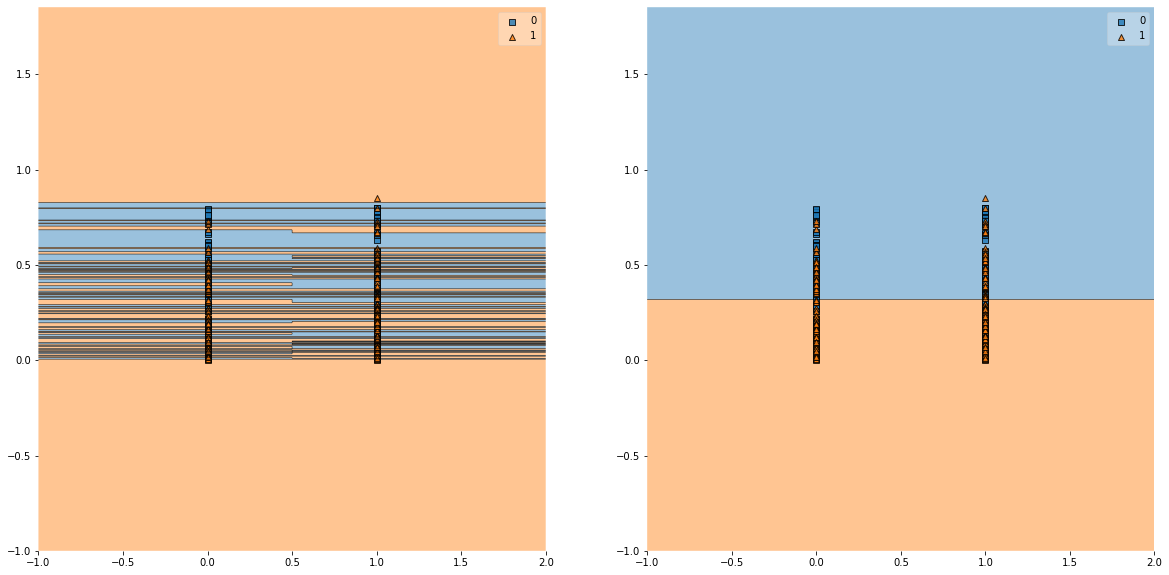

In [493]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [0, 4]]
y_b = y_train[200:]

y_b = y_b.to_numpy()
dt_clf.fit(X_b, y_b)
bag_clf.fit(X_b, y_b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig = plot_decision_regions(clf = dt_clf, X = X_b, y = y_b, ax=axes[0])
fig = plot_decision_regions(clf = bag_clf, X = X_b, y = y_b, ax=axes[1])

We will now train the model found from the GridSearchCV model and look at the precision score, confusion matrix, and classification report.

In [333]:
bc_dtc = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=3), bootstrap='True', max_features= 0.5, max_samples= 0.4, n_estimators= 400)
bc_dtc.fit(X_train, y_train)
y_pred_dtc = bc_dtc.predict(X_test)

In [335]:
print('Bagging Classifier with Decision Tree Test precision score: %.2f'%precision_score(y_test, y_pred_dtc))

Bagging Classifier with Decision Tree Test precision score: 0.86


We look at the bagging classifier's confusion matrix and classification report

In [336]:
print("\nBagging Classifier with Decision Tree Model:")
print(confusion_matrix(y_test, y_pred_dtc))


Bagging Classifier with Decision Tree Model:
[[103  20]
 [  8 119]]


In [337]:
print(classification_report(y_test, y_pred_dtc , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.93      0.84      0.88       123
neutral/dissatisfied       0.86      0.94      0.89       127

            accuracy                           0.89       250
           macro avg       0.89      0.89      0.89       250
        weighted avg       0.89      0.89      0.89       250



From the confusion matrix, we see that the model correctly classified 103 out of 123 instances of dissatisfied customers. ~86%.

#### Bagging with Random Forest Classifier

Next, we look at a bagging model with random forest.

In [296]:
rf = RandomForestClassifier(random_state=0)

In [298]:
# Define param grid
param_grid = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=0, bootstrap='True'), param_grid, n_jobs=-1, cv=5, scoring='precision')
gs_rf.fit(X_train, y_train)

y_pred_rf = gs_rf.predict(X_test)

In [299]:
# Print best parameters
print(gs_rf.best_params_)

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}


From the grid search model, 0.5 max_features, 0.5 max_samples, and 200 n_estimators are the best parameters for the bagging random forest classifier.

In [300]:
print('Test precision score: %.2f'%precision_score(y_test, y_pred))

Test precision score: 0.86


We will now visualize the results on the top best features. 

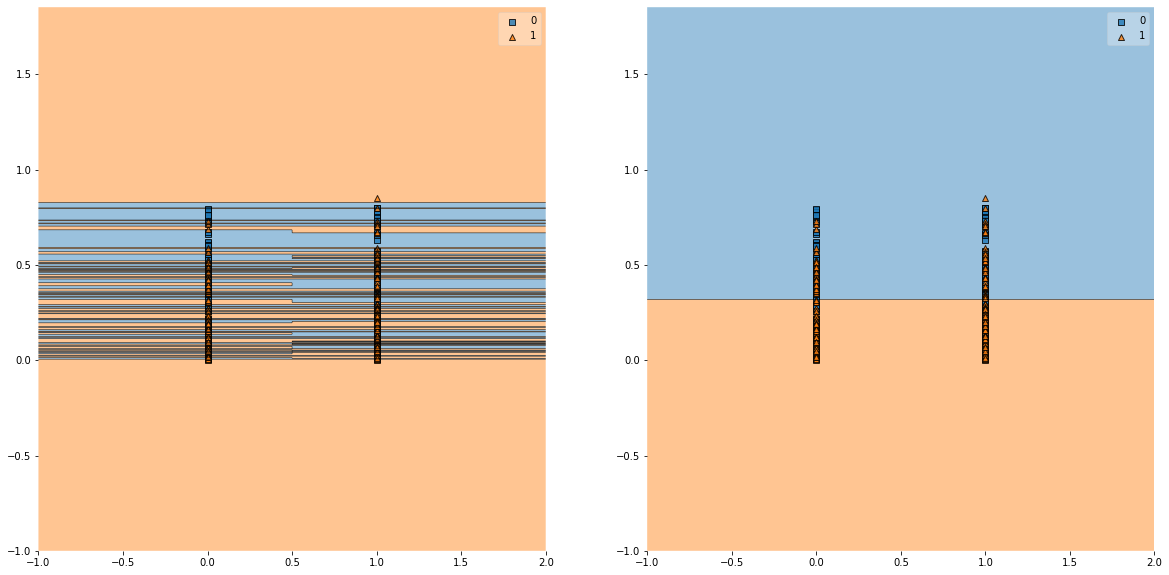

In [494]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [0, 4]]
y_b = y_train[200:]

y_b = y_b.to_numpy()
rf.fit(X_b, y_b)
gs_rf.fit(X_b, y_b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig = plot_decision_regions(clf = dt_clf, X = X_b, y = y_b, ax=axes[0])
fig = plot_decision_regions(clf = bag_clf, X = X_b, y = y_b, ax=axes[1])

We will now train the model and look at the precision score, confusion matrix, and classification report.

In [340]:
bc_rf = RandomForestClassifier(random_state=0, bootstrap='True', max_features= 0.5, max_samples= 0.5, n_estimators= 200)
bc_rf.fit(X_train, y_train)
y_pred_rf = bc_rf.predict(X_test)

We look at the bagging classifier's confusion matrix and classification report

In [341]:
print("\nBagging Model with Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Bagging Model with Random Forest:
[[109  14]
 [  6 121]]


In [342]:
print(classification_report(y_test, y_pred_rf , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.95      0.89      0.92       123
neutral/dissatisfied       0.90      0.95      0.92       127

            accuracy                           0.92       250
           macro avg       0.92      0.92      0.92       250
        weighted avg       0.92      0.92      0.92       250



From the confusion matrix, we see that the model correctly classified 109 out of 123 instances of dissatisfied customers. ~90%.

#### Pasting with a Decision Tree Classifier base

We apply the optimal decision tree classifier with the Bagging Classifier and bootstrap set to false for pasting. After finding the best hyperparameters for the Bagging Classifier, those hyperparameters are used to train a Bagging Classifier model and test the precision score. 

In [276]:
# Define hyperparameters to be tested in grid search
param_grid = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=3), bootstrap='False')
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1)
bag_grid.fit(X_train, y_train) # fit bagging model with data

y_pred = bag_grid.predict(X_test)

In [278]:
print(bag_grid.best_params_) # Print the best parameters for the bagging parameters

{'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.3, 'n_estimators': 400}


From the grid search results, we see that the best parameters for the bagging classifier is to use 400 n_estimators, 0.3 max_samples, 0.5 max_features, and bootstrap set to false. As seen below, we get a precision score of 87% on the test dataset.

In [279]:
from  sklearn.metrics import accuracy_score

print('Train accuracy score: %.2f'%bag_grid.score(X_train, y_train))
print('Test accuracy score: %.2f'%bag_grid.score(X_test, y_test))

# Test precision score
print('Test precision score: %.2f *'%precision_score(y_test, y_pred))

Train accuracy score: 0.94
Test accuracy score: 0.90
Test precision score: 0.87 *


We plot the two most important variables in respect to the bagging classifier with the decision tree classifier base model.

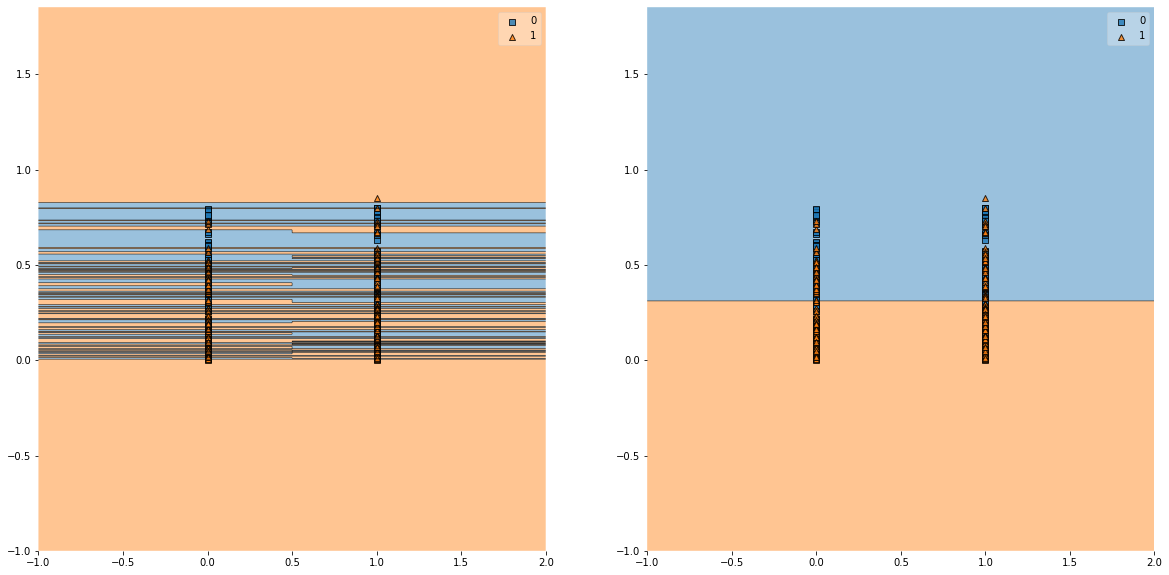

In [495]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [0, 4]]
y_b = y_train[200:] 

y_b = y_b.to_numpy()
dt_clf.fit(X_b, y_b)
bag_clf.fit(X_b, y_b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig = plot_decision_regions(clf = dt_clf, X = X_b, y = y_b, ax=axes[0])
fig = plot_decision_regions(clf = bag_clf, X = X_b, y = y_b, ax=axes[1])

The plot shows slight changes in how bagging improves the precision of classifying dissatisfied customers.

We will now train the model and look at the resulting confusion matrix and classification report.

In [343]:
pc_dtc = bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=3), bootstrap='False', max_features= 0.5, max_samples= 0.3, n_estimators= 400)
pc_dtc.fit(X_train, y_train)
y_pred_pcd = pc_dtc.predict(X_test)

In [344]:
print("Pasting Model with Decision Tree:")
print(confusion_matrix(y_test, y_pred_pcd))

Pasting Model with Decision Tree:
[[104  19]
 [  8 119]]


In [348]:
print(classification_report(y_test, y_pred_pcd , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.93      0.85      0.89       123
neutral/dissatisfied       0.86      0.94      0.90       127

            accuracy                           0.89       250
           macro avg       0.90      0.89      0.89       250
        weighted avg       0.89      0.89      0.89       250



We can see that the model correctly predicts 104 out of 123 neutral / dissatisfied customers. ~87%

#### Pasting with a Random Forest Classifier

In [289]:
rf = RandomForestClassifier(random_state=0)

In [284]:
# Define param grid
param_grid = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5],
              'bootstrap':[True, False]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, n_jobs=-1, cv=5, scoring='precision')
gs_rf.fit(X_train, y_train)

y_pred_rf = gs_rf.predict(X_test)

In [285]:
# Print best parameters
print(gs_rf.best_params_)

{'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 400}


From the grid search results, the best parameters for the random forest bagging model is no bootstrap, 0.5 max_features, 0.1 max_samples, and 400 n_estimators.

In [291]:
print('Test precision score: %.2f'%precision_score(y_test, y_pred))

Test precision score: 0.87


Now, we plot the two most important variables in the dataset.

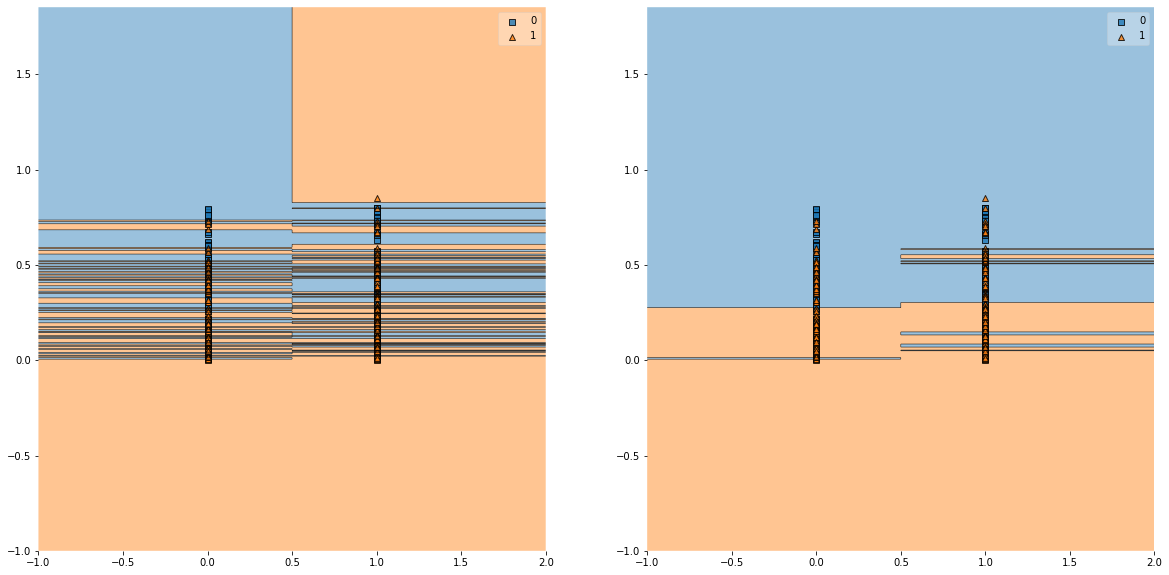

In [496]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_train[200:, [0,4]]
y_b = y_train[200:]

y_b = y_b.to_numpy()
rf.fit(X_b, y_b)
gs_rf.fit(X_b, y_b)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

fig = plot_decision_regions(clf = rf, X = X_b, y = y_b, ax=axes[0])
fig = plot_decision_regions(clf = gs_rf, X = X_b, y = y_b, ax=axes[1])

We will now train the model and look at the confusion matrix and classification report.

In [349]:
pc_rf = RandomForestClassifier(random_state=0, bootstrap='False', max_features= 0.5, max_samples= 0.1, n_estimators= 400)
pc_rf.fit(X_train, y_train)
y_pred_rf = pc_rf.predict(X_test)

In [351]:
# Confusion Matrix
print("Pasting Model with Random Forest:")
print(confusion_matrix(y_test, y_pred_pcd))

Pasting Model with Random Forest:
[[104  19]
 [  8 119]]


In [353]:
# Class report
print(classification_report(y_test, y_pred_rf , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.94      0.87      0.90       123
neutral/dissatisfied       0.88      0.94      0.91       127

            accuracy                           0.91       250
           macro avg       0.91      0.91      0.91       250
        weighted avg       0.91      0.91      0.91       250



We see that this pasting model correctly classifies 104 out of 123 neutral/dissatisfied customers. ~88%

### Adabooster

#### Adabooster with Decision Tree Classifier

In this section, we run a basic adaboost classifier model with a decision tree classifier base. 

In [302]:
from sklearn.ensemble import AdaBoostClassifier

In [355]:
param_grid = {'n_estimators':[100, 500, 1000],  
              'learning_rate':[0.1, 0.5, 1]
             }

In [356]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0))

grid_ada = GridSearchCV(ada_clf, param_grid, cv = 5, scoring= 'precision')
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                random_state=0)),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [100, 500, 1000]},
             scoring='precision')

In [360]:
print(grid_ada.best_params_)

{'learning_rate': 0.1, 'n_estimators': 1000}


In [361]:
print('Test precision score: %.2f'%grid_ada.best_score_)

Test precision score: 0.91


The best parameters for this Ada Boos Classifier model is a 0.1 learning rate and 1000 estimators for a precision score of 90.72%

We will now plot the top 2 most important features that were identified in the Project 1.

<AxesSubplot:>

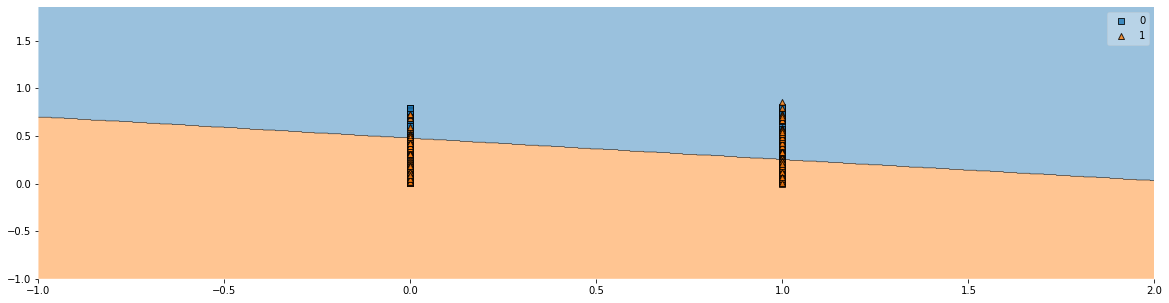

In [488]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np

X_b = X_train[200:, [0, 4]]
y_b = y_train[200:]

grid_ada.fit(X_b, y_b)

y_b = y_b.to_numpy()

plt.subplots(figsize = (20,5))
plot_decision_regions(X = X_b, y = y_b, clf = grid_ada)

We will now train the model and look at the confusion matrix and classification report.

In [359]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), learning_rate=0.1, n_estimators=1000)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [362]:
# Confusion Matrix
print("Ada Boost with Decision Tree:")
print(confusion_matrix(y_test, y_pred_ada))

Ada Boost with Decision Tree:
[[112  11]
 [ 10 117]]


In [363]:
# Class report
print(classification_report(y_test, y_pred_ada , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.92      0.91      0.91       123
neutral/dissatisfied       0.91      0.92      0.92       127

            accuracy                           0.92       250
           macro avg       0.92      0.92      0.92       250
        weighted avg       0.92      0.92      0.92       250



The model was able to correctly predict 112 out of the 123 neutral/dissatisfied customers in the test dataset. ~91%

#### Adabooster with Linear SVM

We will run the adabooster with a linear svm to see how this model performs. 

In [378]:
# Set up parameter grid
param_grid = {'n_estimators':[100, 500, 1000],  
              'learning_rate':[0.1, 0.5, 1]
             }

In [379]:
ada_clf = AdaBoostClassifier(SVC(probability=True,kernel='linear', random_state=0))

grid_ada = GridSearchCV(ada_clf, param_grid, n_jobs=-1, cv = 5, scoring= 'precision')
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=SVC(kernel='linear',
                                                             probability=True,
                                                             random_state=0)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [100, 500, 1000]},
             scoring='precision')

In [380]:
print(grid_ada.best_params_)

{'learning_rate': 0.5, 'n_estimators': 500}


In [381]:
print('Test precision score: %.2f'%grid_ada.best_score_)



Test precision score: 0.85


We will visualize the model's predictions based on the two most important features.

<AxesSubplot:>

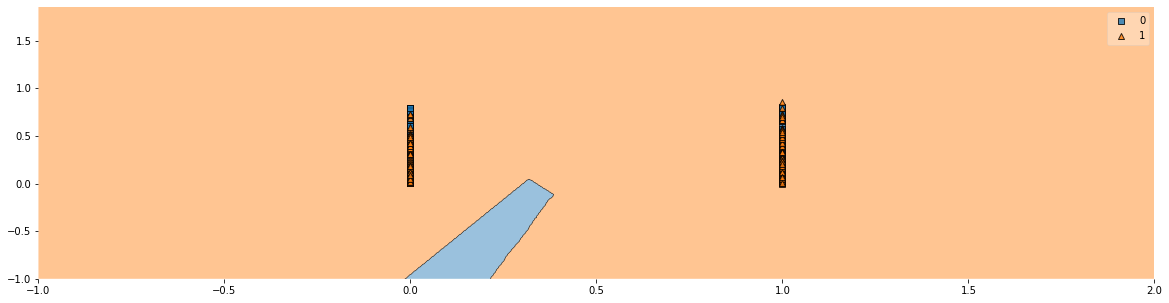

In [487]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np

X_b = X_train[200:, [0, 4]]
y_b = y_train[200:]

grid_ada.fit(X_b, y_b)

y_b = y_b.to_numpy()

plt.subplots(figsize = (20,5))
plot_decision_regions(X = X_b, y = y_b, clf = grid_ada)

Now, we will train the model and look at the precision score, confusion matrix, and classification report.

In [346]:
ada_svm = AdaBoostClassifier(SVC(probability=True,kernel='linear', random_state=0), learning_rate= 0.5, n_estimators= 500)

In [347]:
ada_svm.fit(X_train, y_train)
y_pred_svm = ada_svm.predict(X_test)

In [364]:
# Confusion Matrix
print("Ada Boost with Linear SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Ada Boost with Linear SVM:
[[98 25]
 [28 99]]


In [365]:
# Class report
print(classification_report(y_test, y_pred_svm , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.78      0.80      0.79       123
neutral/dissatisfied       0.80      0.78      0.79       127

            accuracy                           0.79       250
           macro avg       0.79      0.79      0.79       250
        weighted avg       0.79      0.79      0.79       250



The Ada Boost model was able to predict 98 out of 123 instances of neutral/dissatisfied customers in the test set. ~80%

### Gradient Boosting 

For gradient boosting, we tried the most simple default gradient boosting classifier then used a gridsearch model to find better parameters.

In [367]:
# Import module
from sklearn.ensemble import GradientBoostingClassifier

In [369]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

y_pred_gbrt = gbrt.predict(X_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
print("Precision on test set: {:.4f}".format(precision_score(y_test, y_pred_gbrt)))

Accuracy on training set: 0.976
Accuracy on test set: 0.932
Precision on test set: 0.9044


The basic gradient boosting model resulted in a 90.44% precision score. 

In [370]:
# Confusion matrix
print("Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gbrt))

Gradient Boosting:
[[110  13]
 [  4 123]]


In [371]:
# Class report
print(classification_report(y_test, y_pred_gbrt , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.96      0.89      0.93       123
neutral/dissatisfied       0.90      0.97      0.94       127

            accuracy                           0.93       250
           macro avg       0.93      0.93      0.93       250
        weighted avg       0.93      0.93      0.93       250



This model was able to predict 110 out of 123 neutral/dissatisfied correctly. ~90%

Now, running the model with gridsearch

In [374]:
# Define parameter grid 
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
              'learning_rate':[0.001, 0.01, 0.1, 0.5, 1]
             }

In [375]:
gs_gb = GridSearchCV(gbrt, param_grid, n_jobs=-1, cv = 5, scoring= 'precision')
gs_gb.fit(X_train, y_train)
y_pred_gb = gs_gb.predict(X_test)

In [383]:
print(gs_gb.best_params_)

{'learning_rate': 1, 'max_depth': 9}


In [384]:
print('Test precision score: %.4f'%gs_gb.best_score_)

Test precision score: 0.9409


The grid search model found that a learning rate of 1 and max_depth of 9 resulted in the best precision score of 94.09%

We will visualize the top two features.

<AxesSubplot:>

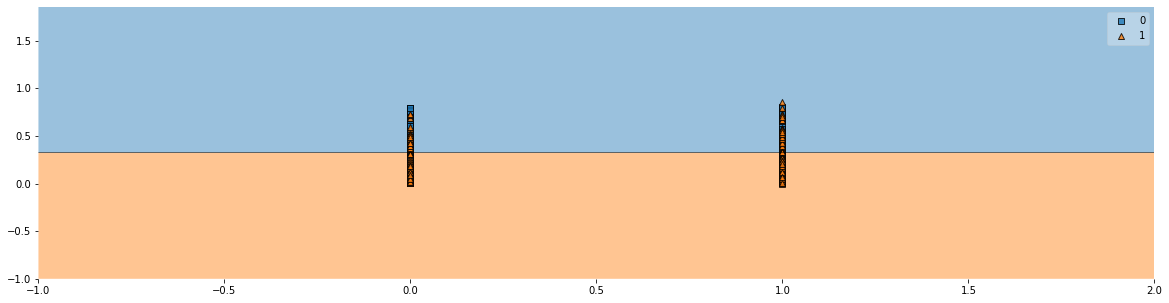

In [486]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np

X_b = X_train[200:, [0, 4]]
y_b = y_train[200:]

gs_gb.fit(X_b, y_b)

y_b = y_b.to_numpy()

plt.subplots(figsize = (20,5))
plot_decision_regions(X = X_b, y = y_b, clf = gs_gb)

Next, the model will be trained and we will look at the confusion matrix and classification report.

In [388]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate = 1, max_depth = 9)
gbrt2.fit(X_train, y_train)
y_pred_gbrt = gbrt2.predict(X_test)

In [389]:
print('Test precision score: %.4f'%precision_score(y_test, y_pred_gbrt))

Test precision score: 0.9649


In [390]:
# Confusion matrix
print("Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gbrt))

Gradient Boosting:
[[119   4]
 [ 17 110]]


In [391]:
# Class report
print(classification_report(y_test, y_pred_gbrt , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.88      0.97      0.92       123
neutral/dissatisfied       0.96      0.87      0.91       127

            accuracy                           0.92       250
           macro avg       0.92      0.92      0.92       250
        weighted avg       0.92      0.92      0.92       250



The gradient model resulted in a 96% precision score on the test data, correctly predicting 119 out of 123 instances of neutral/dissatisfied customers from the test dataset.

### PCA - Run all Project 1 Models after Reducing the Dataset

In this section, we will copy the results from Project 1 models into a table. After, we will reduce the dataset using PCA and run all the project 1 models on the newly reduced set. The results will be compiled into a table and compared to the pre-pca results.

In [392]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [393]:
X_train_pca.shape

(750, 17)

#### KNN Classification

In [394]:
knn = KNeighborsClassifier()

We used GridSearchCV from to run the KNN model with different k numbers 1-20 to see the best parameters that will give the best validation accuracy score. We use cv=3 because the dataset is quite large and n_jobs to run parallel jobs

In [397]:
k_range = list(range(1,30))
param_grid = dict(n_neighbors=k_range)

gs_knn = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, n_jobs=-1, scoring='precision')

In [398]:
# Fit data with model and print best score and parameters
gs_knn.fit(X_train_pca, y_train)
print("Best score: {}".format(gs_knn.best_score_))
print("Best parameters: {}".format(gs_knn.best_params_))

Best score: 0.8653946253946254
Best parameters: {'n_neighbors': 2}


The grid search model showed that the best number of neighbors for the knn model is 2 for a precision validation score of 86.54%

In [399]:
train_score_array = []
test_score_array = []

for k in range(1,30):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_pca, y_train)
    train_score_array.append(knn.score(X_train_pca, y_train))
    test_score_array.append(knn.score(X_test_pca, y_test))

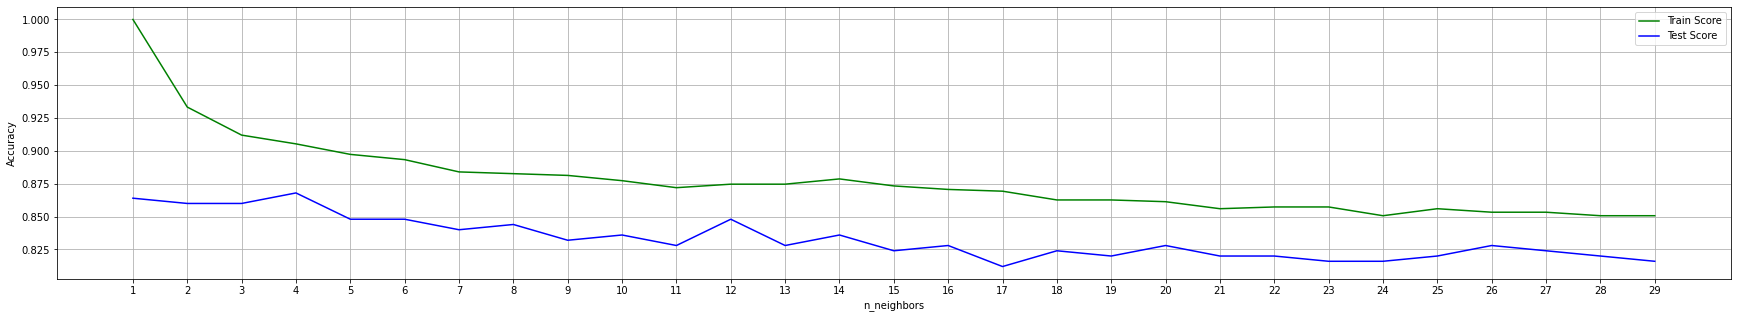

In [400]:
x_axis = range(1,30)
%matplotlib inline

plt.subplots(figsize = (30,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(29)+1)
plt.grid()
plt.legend()

At 2 nearest neighbors, the gap between the precision score of training and test scores is minimalized while also maximizing the test precision scores. The graph above looks at the accuracy of the model. Because of the tradeoffs of optimizing based on the precision score, accuracy does drop but the percentage of accurate predictions for dissatisfied customers is maximized.

We now look at the recall and precision scores after training the model with the best hyperparameters to see how the model performs with these metrics.

In [402]:
knn2 = KNeighborsClassifier(2)
knn2_fit = knn2.fit(X_train_pca, y_train)
knn2_pred = knn2_fit.predict(X_test_pca)

Text(0, 0.5, 'Inflight Wifi')

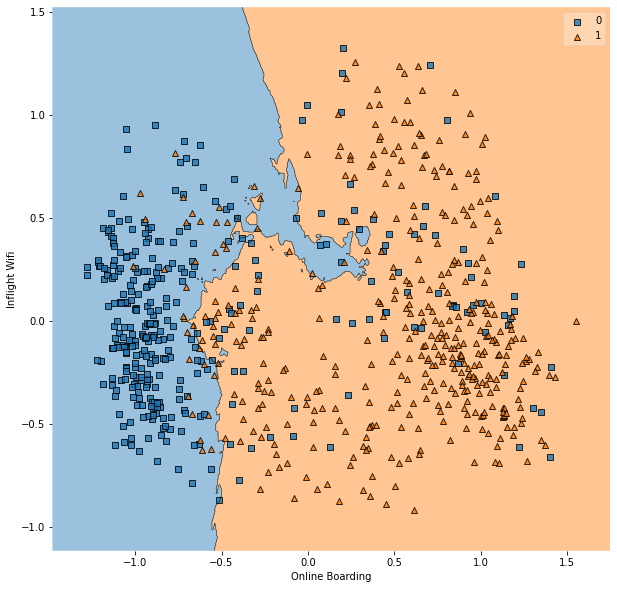

In [485]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train_pca[:,[0,4]]
y_b = y_train[:]
y_b = y_b.to_numpy()

knn_b = knn.fit(X_b, y_b)

fig = plt.figure(figsize=(10, 10))
plt.xlim(0, 1)
plt.ylim(0,0.8)

plot_decision_regions(X_b, y_b, clf = knn_b, zoom_factor = 5)
plt.xlabel('Online Boarding')
plt.ylabel('Inflight Wifi')

In [413]:
print("Test precision score: %.4f "%precision_score(y_test, knn2_pred))

Test precision score: 0.8966 


In [405]:
# Confusion Matrix
confusion_matrix(y_test, knn2_pred)

array([[111,  12],
       [ 23, 104]])

In [414]:
# Class report
print(classification_report(y_test, knn2_pred, target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.83      0.90      0.86       123
neutral/dissatisfied       0.90      0.82      0.86       127

            accuracy                           0.86       250
           macro avg       0.86      0.86      0.86       250
        weighted avg       0.86      0.86      0.86       250



The confusion matrix shows that the model is able to correctly predict 111 out of 123 neutral/dissatisfied customers. ~90% with fewer features and less computation power needed.

#### Logistic Regression

In [415]:
# Using GridSearchCV to find best hyperparameters - using 3 folds because dataset is large
lr = LogisticRegression(random_state=0)
solvers = ['lbfgs', 'liblinear']
penalty = ['l2']
c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_gridlr = dict(solver=solvers, penalty=penalty, C=c_vals)

grid_searchlr = GridSearchCV(lr, param_gridlr, cv=5, scoring='precision', n_jobs=-1)

In [416]:
grid_searchlr.fit(X_train_pca, y_train)

# Print results
print("Best score: {}".format(grid_searchlr.best_score_))
print("Best parameters: {}".format(grid_searchlr.best_params_))

Best score: 0.8645777247522599
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


We also plot the different iterations of the model to see how the accuracy of the model compares for each. 

In [419]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l2 = []
test_score_l2 = []

for c in c_range:
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 1000)
    log_l2.fit(X_train_pca, y_train)
    train_score_l2.append(log_l2.score(X_train_pca, y_train))
    test_score_l2.append(log_l2.score(X_test_pca, y_test))

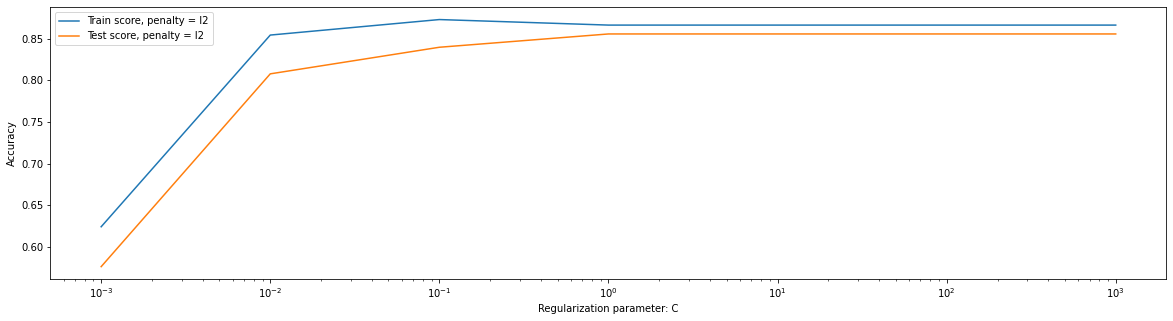

In [420]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

The best parameters are C=100, penaly=l2, and solver=lbfgs. This gives the best precision score of 86%

Next, we train our model with the best hyperparameters and take a look at the confusion matrix to see how many true positives and negatives as well as false positive and negative result from the model's prediction compared to actual data in the test dataset.

In [426]:
logreg = LogisticRegression(random_state=0, C=100, penalty='l2', solver='lbfgs')
logreg_fit = logreg.fit(X_train_pca, y_train)
pred_logreg = logreg_fit.predict(X_test_pca)

We'll look at the confusion matrix of the predictions as well as the classification reports showing the precision and recall scores.

In [427]:
from sklearn.metrics import confusion_matrix

print("\nLogisticRegression:")
print(confusion_matrix(y_test, pred_logreg))


LogisticRegression:
[[102  21]
 [ 15 112]]


In [423]:
print(classification_report(y_test, logreg.predict(X_test_pca) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.87      0.83      0.85       123
neutral/dissatisfied       0.84      0.88      0.86       127

            accuracy                           0.86       250
           macro avg       0.86      0.86      0.86       250
        weighted avg       0.86      0.86      0.86       250



Here we can see that there are 102 out of 123 correct predictions for neutral or dissatisfied customers and 112 out of 127 correct predictions for when customers are satisfied.

In [424]:
print("Recall score logistic regression: {}".format(recall_score(y_test, pred_logreg)))
print("Precision score logistic regression: {}".format(precision_score(y_test, pred_logreg)))

Recall score logistic regression: 0.8818897637795275
Precision score logistic regression: 0.8421052631578947


We look at the scores of the data before any preprocessing.

In [425]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(grid_searchlr.decision_function(X_test_pca) >= 0.5, 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

Before the post processing: 
Precision:  0.896551724137931
Recall:  0.8188976377952756


Now we look at the precision recall curve and do post-processing based on the threshold values closest to 0.90.

In [429]:
from sklearn.metrics import precision_recall_curve

In [430]:
# Look up optimal threshold for precision nearest to 0.90
precision, recall, thresholds = precision_recall_curve(y_train, grid_searchlr.decision_function(X_train_pca))

In [431]:
np.argmin(np.abs(precision - 0.91))

259

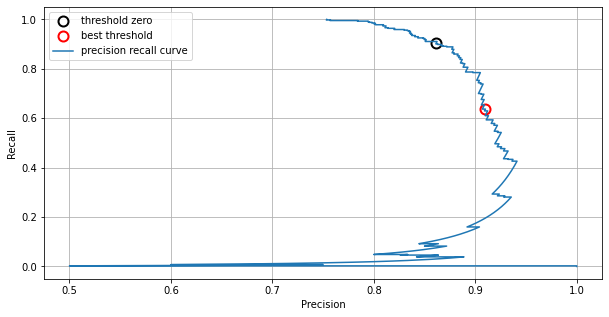

In [432]:
from sklearn.metrics import precision_recall_curve

%matplotlib inline

plt.subplots(figsize = (10,5))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
          label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision[259], recall[259], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='r', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [433]:
# Look at the new threshold
thresholds[259]

1.517585464423343

Now we work on post-processing the data with the new threshold.

In [434]:
from sklearn.metrics import precision_score, recall_score

y_predict = np.where(grid_searchlr.decision_function(X_test_pca) >= thresholds[259], 1, 0)
print('After the post processing: ')
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))

After the post processing: 
Precision:  0.9367088607594937
Recall:  0.5826771653543307


New results for the classification reports:

In [435]:
print(classification_report(y_test, y_predict , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.69      0.96      0.80       123
neutral/dissatisfied       0.94      0.58      0.72       127

            accuracy                           0.77       250
           macro avg       0.81      0.77      0.76       250
        weighted avg       0.82      0.77      0.76       250



In [436]:
# Check overall accuracy
confusion_matrix(y_test, y_predict)

array([[118,   5],
       [ 53,  74]])

This shows improved precision for the positive case (predicting whether a customer is likely to be neutral/dissatisfied about the airline's service), even though it is at the expense of the recall score.

#### SVM Linear SVC model

Next, we looked at Support Vector Machine Models. We instantiated the model and plotted the decision regions

In [437]:
clf = LinearSVC(random_state=0)

Then we ran GridSearchCV to find the best optimal parameters.

In [438]:
param_gridclf = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}

grid_searchclf = GridSearchCV(clf, param_gridclf, cv=5, n_jobs=-1)

In [439]:
# Fit model and print results
clf_results = grid_searchclf.fit(X_train_pca, y_train)

print("Best score: {}".format(clf_results.best_score_))
print("Best parameters: {}".format(clf_results.best_params_))

Best score: 0.8626666666666667
Best parameters: {'C': 0.01}


We also look at the classification report for this model's predictions.

In [440]:
print(classification_report(y_test, clf_results.predict(X_test_pca) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.86      0.80      0.83       123
neutral/dissatisfied       0.82      0.87      0.84       127

            accuracy                           0.84       250
           macro avg       0.84      0.84      0.84       250
        weighted avg       0.84      0.84      0.84       250



Optimal hyperparameters are 0.01 which gives a precision score of 82%. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


<AxesSubplot:>

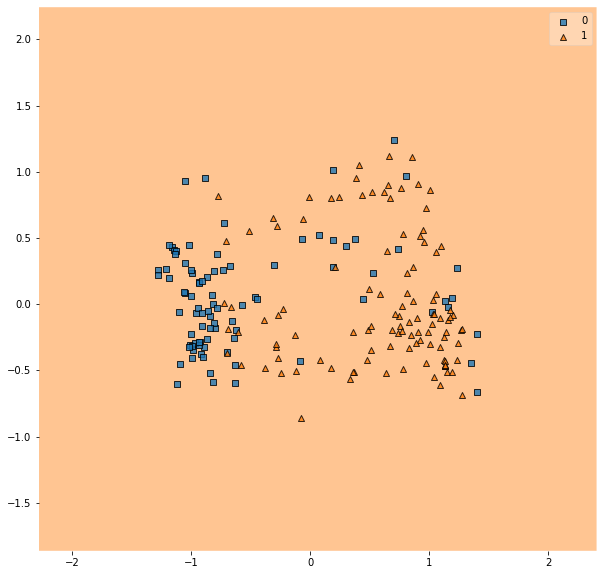

In [484]:
X_b =  X_train_pca[:200,[0,4]]
y_b = y_train[:200]
y_b = y_b.to_numpy()

LSVC = SVC(random_state=0, C=0.01)
LSVC.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = LSVC)

#### Kernelized Support Vector Machine
* rbf
* poly
* linear

We will first instantiate a baselin svc model.

In [443]:
svc = SVC(random_state=0)

##### rbf
We ran the kernelized svm model with GridSearchCV to find the best optimal parameters using cv=5 and n_jobs=-1.

In [444]:
param_gridrbf = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']}

param_gridrbf = GridSearchCV(svc, param_gridrbf, cv=5, n_jobs=-1, scoring='precision')

In [445]:
# Fit grid model and print best results
rbf_results = param_gridrbf.fit(X_train_pca, y_train)
print("Best score: {}".format(rbf_results.best_score_))
print("Best parameters: {}".format(rbf_results.best_params_))

Best score: 0.8846969585111388
Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


We also look at the classification report for this model's predictions.

In [447]:
print(classification_report(y_test, rbf_results.predict(X_test_pca) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.92      0.87      0.90       123
neutral/dissatisfied       0.88      0.93      0.90       127

            accuracy                           0.90       250
           macro avg       0.90      0.90      0.90       250
        weighted avg       0.90      0.90      0.90       250



Optimal parameters of C=100 and gamma=0.1 give a precision score of 88.47%

We will plot the decision regions for this model. 

<AxesSubplot:>

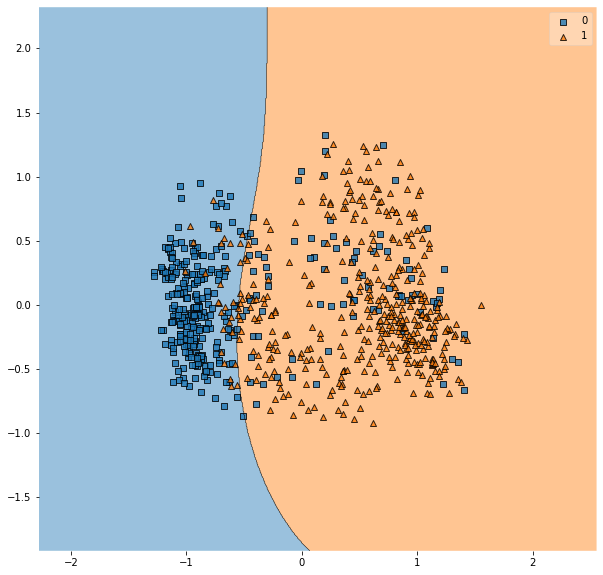

In [483]:
X_b =  X_train_pca[:,[0,4]]
y_b = y_train[:]
y_b = y_b.to_numpy()

rbf = SVC(random_state=0, C=100, gamma=0.1, kernel='rbf')
rbf.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = rbf)

##### poly
Next we ran the kernelized svm model with poly as the kernel using GridSearchCV to find the best parameters

In [449]:
param_gridpoly = {'C': [0.1, 1, 10, 100, 1000],
                 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'kernel': ['poly']}

param_gridpoly = GridSearchCV(svc, param_gridpoly, cv=5, n_jobs=-1, scoring='precision')

In [450]:
# Fit model and print best results
poly_results = param_gridpoly.fit(X_train_pca, y_train)
print("Best score: {}".format(poly_results.best_score_))
print("Best parameters: {}".format(poly_results.best_params_))

Best score: 0.8802569052569051
Best parameters: {'C': 1, 'degree': 9, 'kernel': 'poly'}


In [451]:
print(classification_report(y_test, poly_results.predict(X_test_pca) , target_names = ['satisfied', 'neutral/dissatisfied']))

                      precision    recall  f1-score   support

           satisfied       0.81      0.92      0.86       123
neutral/dissatisfied       0.91      0.79      0.84       127

            accuracy                           0.85       250
           macro avg       0.86      0.85      0.85       250
        weighted avg       0.86      0.85      0.85       250



Optimal parameters of C=1 and degree=9 give a precision score of 91% on the test dataset

We will plot the decision regions for this model. 

<AxesSubplot:>

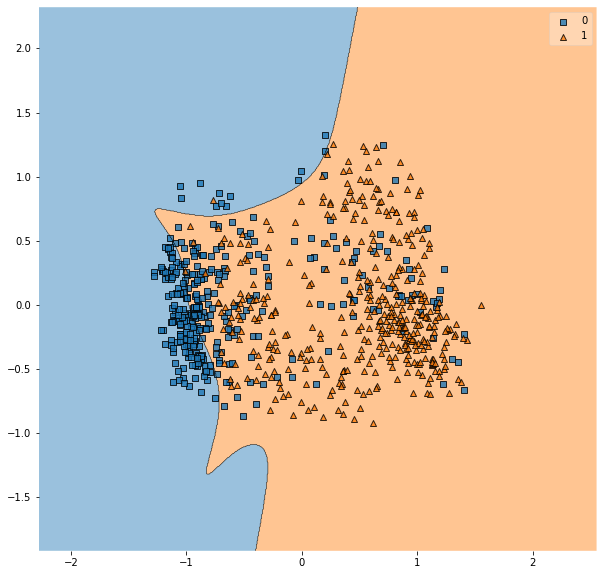

In [482]:
X_b =  X_train_pca[:,[0,4]]
y_b = y_train[:]
y_b = y_b.to_numpy()

poly = SVC(random_state=0, C=1, degree=9, kernel='poly')
poly.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = poly)

##### linear
For the final kernelized svm, we ran the svm with the linear kernel using GridSearchCV to find the best hyperparameters using cv=5 and n_jobs=-1

In [453]:
param_gridlinear = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'kernel': ['linear']}

grid_searchl = GridSearchCV(svc, param_gridlinear, cv=5, n_jobs=-1, scoring='precision')


In [454]:
# Fit model and print best results
l_results = grid_searchl.fit(X_train_pca, y_train)
print("Best score: {}".format(l_results.best_score_))
print("Best parameters: {}".format(l_results.best_params_))

Best score: 0.8545667660994445
Best parameters: {'C': 0.1, 'kernel': 'linear'}


In [455]:
print(classification_report(y_test, l_results.predict(X_test_pca) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.91      0.80      0.85       123
neutral/dissatisfied       0.82      0.92      0.87       127

            accuracy                           0.86       250
           macro avg       0.87      0.86      0.86       250
        weighted avg       0.87      0.86      0.86       250



The best parameters for the linear kernelized svm is C=0.1. Now we plot the decision region for the top two variables. 

<AxesSubplot:>

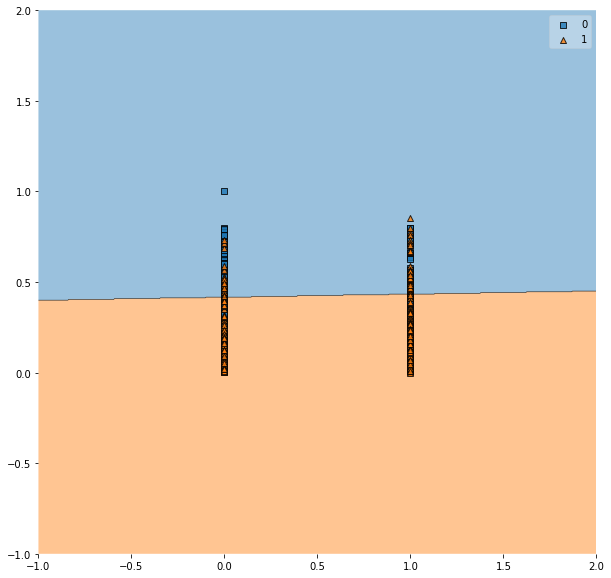

In [481]:
X_b =  X_train[:,[0,4]]
y_b = y_train[:]
y_b = y_b.to_numpy()

linear = SVC(random_state=0, C=0.1, kernel='linear')
linear.fit(X_b, y_b)

plt.subplots(figsize = (10,10))

plot_decision_regions(X_b, y_b, clf = linear)

#### Decision Tree

Our last model to rerun with the pca reduced dataset is the decision tree. We use the grid search method to check for the optimal max_depth between 1-20 depths.

In [457]:
param_griddt = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

#gridsearch object
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_griddt, cv=5, return_train_score=True, scoring='precision')

gs_dt.fit(X_train_pca, y_train)

print("Best parameters: {}".format(gs_dt.best_params_))
# Question 12 - What is the best score 
print("Best cross-validation score: {}".format(gs_dt.best_score_))

Best parameters: {'max_depth': 11}
Best cross-validation score: 0.854883556764926


The best model uses a max_depth of 11 for a precision score of 0.854883

Next, we visualize the results by training and predicting using the optimal max_depth of 11.

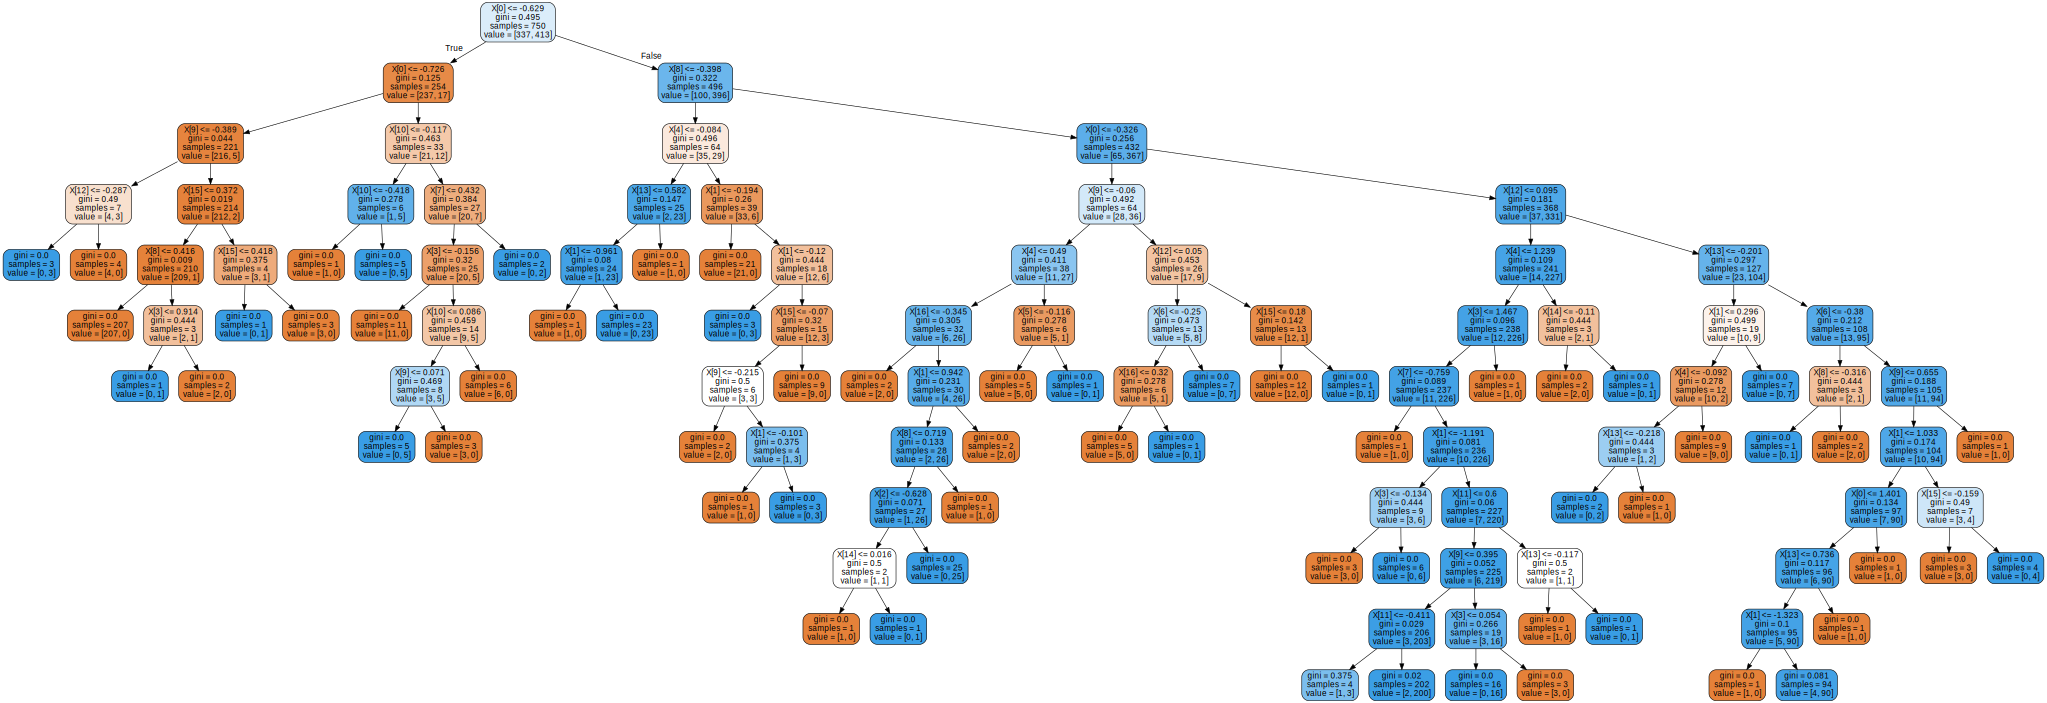

In [461]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Create DOT data
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(max_depth=11)
tree.fit(X_train_pca, y_train)

dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True) 

# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

In [465]:
tree.score(X_test_pca, y_test)

0.808

The test score for the best decision tree is 80.8%.

We will take a look at the classification report now.

In [466]:
print(classification_report(y_test, tree.predict(X_test_pca) , target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.83      0.76      0.80       123
neutral/dissatisfied       0.79      0.85      0.82       127

            accuracy                           0.81       250
           macro avg       0.81      0.81      0.81       250
        weighted avg       0.81      0.81      0.81       250



We took a look at the most important variables in the model to look at the decision regions. 

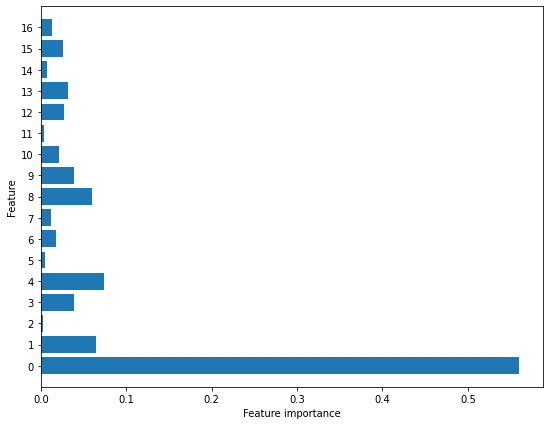

In [479]:
%matplotlib inline

def plot_feature_importances(model):
    fig, ax = plt.subplots(figsize=(9, 7))
    n_features = X_train_pca.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

The 1st and 5th feature play the greatest importance

In [477]:
i = np.identity(X.shape[1])  # identity matrix
coef = pca.transform(i)

pd.DataFrame(coef, columns=['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7',
                            'PC-8', 'PC-9', 'PC-10', 'PC-11', 'PC-12', 'PC-13', 'PC-14', 'PC-15', 'PC-16', 'PC-17'], index=X.columns)


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17
Gender,1.352863,1.661078,0.418926,0.633643,-0.564366,-0.190096,0.527567,-0.098613,0.232843,-0.789974,0.181936,-0.083408,-0.070008,0.415622,-0.311527,0.004012,0.009098
Customer Type,1.329567,1.390655,-0.667509,0.545784,-0.932846,0.229486,0.403680,0.163610,0.142413,-0.439839,0.135711,-0.145622,0.249107,0.240273,-0.396828,0.067143,-0.163332
Age,1.338765,1.563861,-0.560659,0.764814,-0.473207,0.089502,0.433413,-0.057392,0.080180,-0.493273,0.366478,-0.075939,-0.531316,0.590877,0.242491,-0.322527,0.104263
Type of Travel,0.969353,1.944816,-0.443748,0.991658,0.076480,-0.011999,0.523891,-0.082428,0.101930,-0.262709,0.285096,-0.091014,0.046366,0.076517,-0.318723,0.055390,-0.028535
Flight Distance,1.254553,1.630107,-0.533662,0.726921,-0.424110,0.013791,0.467536,-0.008178,0.218170,-0.704295,0.159325,0.096992,0.141299,0.507869,-0.504957,-0.048857,0.900555
Inflight wifi service,1.318307,1.454429,-0.474101,0.515831,-0.085034,0.160262,0.514206,-0.146884,-0.105183,-0.966332,0.168216,-0.058897,-0.022098,0.489603,-0.412490,-0.008360,0.008324
Departure/Arrival time convenient,1.397913,1.423642,-0.513510,0.370984,-0.273991,0.177126,0.618640,-0.195992,0.527078,-0.821795,0.411235,-0.039111,-0.458627,-0.191311,-0.391356,0.045274,0.163390
Ease of Online booking,1.295033,1.516406,-0.469155,0.438569,-0.056968,0.232987,0.498429,-0.150421,-0.016144,-0.974648,0.149665,0.007563,-0.033419,0.453293,-0.318378,-0.026234,0.118326
Gate location,1.331179,1.525141,-0.445110,0.432570,-0.062224,0.262988,0.692155,-0.179957,0.710622,-0.479081,0.189556,-0.258053,0.139712,0.908019,-0.302176,-0.046945,-0.082459
Food and drink,1.259646,1.267655,-0.447312,1.106753,-0.281270,0.171332,0.633786,-0.076268,0.377241,-1.105245,0.226531,0.117924,0.266553,0.270066,0.180816,0.194452,-0.012012


<AxesSubplot:>

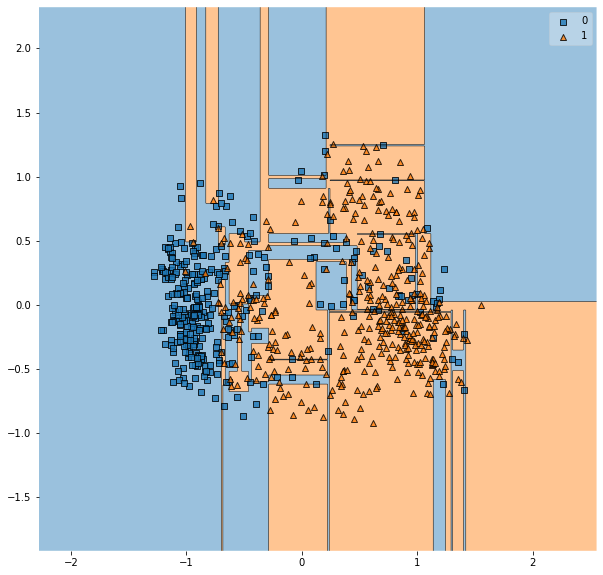

In [497]:
X_b =  X_train_pca[:,[0,4]]
y_b = y_train[:]
y_b = y_b.to_numpy()

plt.subplots(figsize = (10,10))
dtree = DecisionTreeClassifier(max_depth = 11)
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b, clf = dtree)

##### Compare pre-pca and post-pca hyperparameters and results

First, we will look at the table with modeling results of hyperparameters and precision scores on the pre-pca full dataset.

| Model| Hyperparameters | Precision Test Score |
| :---: | :--- | :---: |
| KNN | n_neighbors: 2 | 0.8908 |
| Logistic Regression | C: 1 <br> penalty: l2 <br> solver: liblinear | 0.9318 |
| SVM Linear SVC | C: 0.1 | 0.8700 |
| Kernelized rbf | C: 1000 <br> gamma: 0.1 <br> kernel: rbf | 0.8929 |
| Kernelized poly | C: 10 <br> degree: 2 <br> kernel: poly | 0.89001 |
| Kernelized linear | C: 0.1 <br> kernel: linear | 0.8550 |
| Decision Tree | max_depth: 3 | 0.8739 |

In [633]:
%%html
<style>
table {float:left}
</style>

Next, we look at the post-pca dataset results.

| Model| Hyperparameters | Precision Test Score |
| :---: | :--- | :---: |
| KNN | n_neighbors: 2 | 0.8966 |
| Logistic Regression | C: 100 <br> penalty: l2 <br> solver: lbfgs | 0.8966 |
| SVM Linear SVC | C: 0.01 | 0.8627 |
| Kernelized rbf | C: 100 <br> gamma: 0.1 <br> kernel: rbf | 0.8847 |
| Kernelized poly | C: 1 <br> degree: 9 <br> kernel: poly | 0.8803|
| Kernelized linear | C: 0.1 <br> kernel: linear | 0.8547 |
| Decision Tree | max_depth: 11 | 0.8549 |

Notes: Overall, the post-pca reduced dataset performed slightly worse than the pre-pca full datasets. It would be best to use the full datasets when compiling the models. 

### Neural Networks
First, we will import the necessary libraries for the neural networks.

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import keras

np.random.seed(0) # for reproducibility
tf.random.set_seed(0)

In [563]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [565]:
keras.__version__ 

'2.6.0'

##### Perceptron model
We will first run a perceptron model on the full dataset.

In [492]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (750, 24)
y_train shape (750,)
X_test shape (250, 24)
y_test shape (250,)


In [590]:
# step 1: build the model
model2 = Sequential()
model2.add(Dense(254, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# step 2: compile the model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# step 3: Evaluate the model
model2.fit(X_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
6/6 [==============================] - 1s 3ms/step - loss: 0.6631 - accuracy: 0.7480
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.8200
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.5003 - accuracy: 0.8080
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.8080
Epoch 5/20
6/6 [==============================] - 0s 4ms/step - loss: 0.4016 - accuracy: 0.8307
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8507
Epoch 7/20
6/6 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8653
Epoch 8/20
6/6 [==============================] - 0s 4ms/step - loss: 0.3391 - accuracy: 0.8667
Epoch 9/20
6/6 [==============================] - 0s 4ms/step - loss: 0.3151 - accuracy: 0.8680
Epoch 10/20
6/6 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.8627
Epoch 11/20
6/6 [======================

In [596]:
# Step 4: Model evaluation

loss_and_metrics = model2.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

8/8 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8520
Test Loss 0.36615684628486633
Test Accuracy 0.8519999980926514


In [600]:
# predict probabilities for test set
yhat_probs = model2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model2.predict(X_test, verbose=0)>0.5

In [592]:
print("Test precision score: %.4f "%precision_score(y_test, yhat_classes))

Test precision score: 0.8082 


Epoch 1/10
10/10 [==============================] - 0s 15ms/step - loss: 0.1857 - accuracy: 0.9183 - val_loss: 0.2528 - val_accuracy: 0.8733
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1776 - accuracy: 0.9217 - val_loss: 0.1937 - val_accuracy: 0.9133
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1583 - accuracy: 0.9267 - val_loss: 0.2611 - val_accuracy: 0.8667
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9533 - val_loss: 0.2194 - val_accuracy: 0.9200
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1425 - accuracy: 0.9400 - val_loss: 0.1869 - val_accuracy: 0.9067
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1036 - accuracy: 0.9717 - val_loss: 0.2115 - val_accuracy: 0.9067
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1103 - accuracy: 0.9500 - val_loss: 0.2375 - val_accuracy: 0.8933
Epoch 8/10
10/10 [=

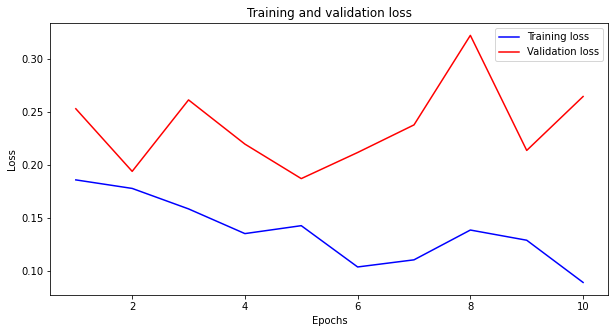

In [923]:
history = model2.fit(X_train, y_train, batch_size=64, validation_split=0.2, epochs=10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Convolutional network
Next, we train a convolutional network model on the data.

In [743]:
X_train2 = X_train.reshape(-1, X_train.shape[1], X_train.shape[2],1)
X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [744]:
X_train2.shape

(750, 24, 1, 1)

In [692]:
# step 1: build the model
model3 = Sequential()
# Must define the input shape in the first layer of the neural network
model3.add(Conv2D(filters=32, kernel_size=2, padding='same', 
                  activation='relu', input_shape=(24, 1, 1))) 
model3.add(MaxPooling2D(pool_size=2, padding='same'))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation = 'sigmoid'))
model3.add(Flatten())

# step 2: compile the model
model3.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# step 3: Evaluate the model
model3.fit(X_train2, y_train, batch_size=64, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.1853
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.2067
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.2013
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.2107
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.2053
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.2160
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.1773
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.1613
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.1520
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.1173


In [698]:
# Step 4: Model evaluation

loss_and_metrics = model3.evaluate(X_test2, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

8/8 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.1360
Test Loss 0.6930840611457825
Test Accuracy 0.13600000739097595


Epoch 1/10
10/10 [==============================] - 0s 52ms/step - loss: 0.6765 - accuracy: 0.1167 - val_loss: 0.6668 - val_accuracy: 0.1400
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.1133 - val_loss: 0.6677 - val_accuracy: 0.1400
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 0.6742 - accuracy: 0.1267 - val_loss: 0.6675 - val_accuracy: 0.1533
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6738 - accuracy: 0.1300 - val_loss: 0.6664 - val_accuracy: 0.1467
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6727 - accuracy: 0.1433 - val_loss: 0.6653 - val_accuracy: 0.1467
Epoch 6/10
10/10 [==============================] - 0s 30ms/step - loss: 0.6718 - accuracy: 0.1233 - val_loss: 0.6654 - val_accuracy: 0.1333
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6716 - accuracy: 0.1417 - val_loss: 0.6637 - val_accuracy: 0.1400
Epoch 8/10
10/10 

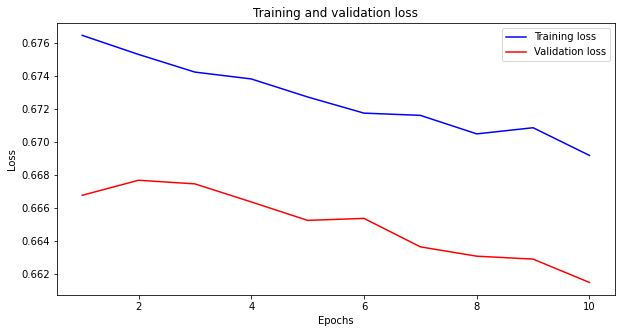

In [922]:
history2 = model3.fit(X_train2, y_train, batch_size=64, validation_split=0.2, epochs=10)

loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [769]:
# predict probabilities for test set
yhat_probs2 = model3.predict(X_test2, verbose=0)
# predict crisp classes for test set
yhat_classes2 = yhat_probs2 > 0.5


In [728]:
yhat_classes2.shape

(250, 12)

In [781]:
yhat_classes2 = yhat_classes2[:,0]

In [783]:
print("Test precision score: %.4f "%precision_score(y_test, yhat_classes2))

Test precision score: 0.5080 


## Final Model: Gradient Boosting Classifer
In conclusion, the best model for this dataset that best predicted whether a customer would be dissatisfied or neutral about their experience with the airline is the Gradient Boosting Classifier model with a learning_rate = 1 and max_depth = 9. It offered the best precision score without post-processing and keeping the recall and accuracy score high. 

In [917]:
# Train model 

gbrt_final = GradientBoostingClassifier(random_state=0, learning_rate = 1, max_depth = 9)
gbrt_final.fit(X_train, y_train)
y_pred_gbrt_final = gbrt_final.predict(X_test)

print('Gradient Boosting Classifier Test precision score: %.4f'%precision_score(y_test, y_pred_gbrt))

print("Gradient Boosting Classifier Test Accuracy Score: ", gbrt_final.score(X_test, y_test))

Gradient Boosting Classifier Test precision score: 0.9649
Gradient Boosting Classifier Test Accuracy Score:  0.916


In [918]:
print(classification_report(y_test, y_pred_gbrt_final, target_names=["satisfied", "neutral/dissatisfied"]))

                      precision    recall  f1-score   support

           satisfied       0.88      0.97      0.92       123
neutral/dissatisfied       0.96      0.87      0.91       127

            accuracy                           0.92       250
           macro avg       0.92      0.92      0.92       250
        weighted avg       0.92      0.92      0.92       250

